<div align="right"> Team: Abnormal Distribution <br> <i> Pranatha Rao, Madhava Peddisetti, Rohit Khokle

<font style="font-family:verdana"><center> <br><i> Remember this guy from the comicbook assignment?<br>
    <center>
<img src="pictures/1.png" width=400 />
</center>

<font style="font-family:verdana"> <i> Mowgli got recruited as a budding young data scientist in Ministry of Finance for <b> Republic of Datastan. <b /> 

## Republic of Datastan is our new country!!

<font style="font-family:verdana"><center> <br><i> 
    <center>
<img src="pictures/2.jpeg" width=400 />
</center>


<font style="font-family:verdana"> <i> 
Mowgli's job is to give detailed analysis on what factors contribute to the country's economic growth! <br>
And also to predict the GDP of various countries using Linear Regression, Random Forrest and ANN. <br>
<br>
So the goverment of Datastan can replicate and adapt its policies to stand out in the world
As Republic of Datastan is a new country, it can learn from how the countries around the world are growing and then adapt the best methods so it reach global heights and marks its place on the world!
<br>


<font style="font-family:verdana">
We consider GDP as economic growth parameter.   
    
<br>    
Talking about GDP, below is the GDP of USA from wiki
    <center>
    <img src="pictures/GDP_Wiki.png" width=400 />
</center>

<font style="font-family:verdana"> <br> As seen above, Agriculture, Industry and Services are major contributors to the GDP. 
<br> Lets plot and see how it looks graphically <br> Import some housekeeping libraries we will need <br>  <br> 

In [3]:
import pandas as pd
import pycountry
import wbdata
import datetime
import statsmodels.formula.api as smf
import numpy as np
import pylab
import matplotlib
import matplotlib.pyplot as plt

<font style="font-family:verdana"> <br> Wbdata is a simple python interface to find and request information from the World Bank’s various databases <br>  Currently, wbdata wraps most of the World Bank API, and also adds some convenience functions for searching and retrieving information.<br> <br>

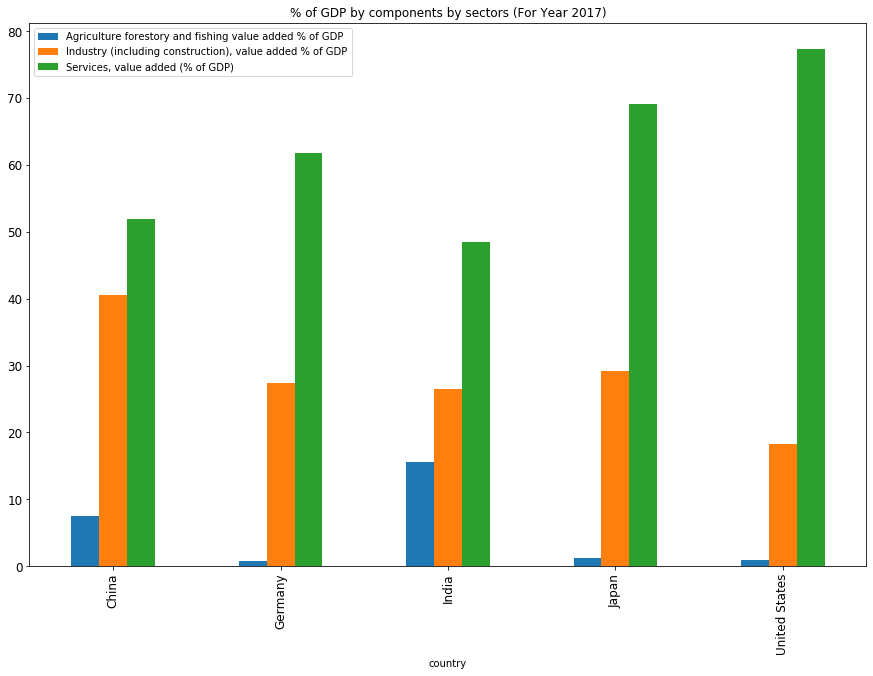

In [4]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1)) # here we give date window
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data


countries = ["JP","DE","US","CN","IN"] # we mention country's codes
 
# Indicators
indicators = {'NV.AGR.TOTL.ZS' :'Agriculture forestory and fishing value added % of GDP', 
              'NV.IND.TOTL.ZS' :'Industry (including construction), value added % of GDP',
              'NV.SRV.TOTL.ZS' : 'Services, value added (% of GDP)'
             }

gdp_ppp = load_from_wbdata(countries, indicators, 2017, 2017)



import matplotlib.pyplot as plt
gdp_ppp.plot(kind='bar', title ="% of GDP by components by sectors (For Year 2017)",figsize=(15,10),legend=True, fontsize=12)


<font style="font-family:verdana"> As seen above, Agriculture, Industry and Services are major contributors to the GDP. 
But aim of our project is to find the subtle sectors that affect the GDP in the long run.. <br> <br> The first subtle section we focus on is <b> Education

<html> <center> <font style="font-family:verdana"> <br> <br> <h3> Why should Republic of Datastan invest in the education of its population? <br> <br> 

<font style="font-family:verdana" size = 4> Economists, all over the world, have long believed that investments in education, or “human capital,” are an important source of economic growth. But how true is this?
   <br> <br>The following analysis reflects if spending on education indeed has any role to play in economic growth of the country. Here we can decide if spending on education will be worth it.

<html> <center> <font style="font-family:verdana"> <br> <br> <h3> How are we going to do the analysis? <br> <br> 

<font style="font-family:verdana" size = 4> <br> <br>   We are finding <u> Goverment's expenditure (on primary, lower secondary and higher secondary levels) per student </u> for various countries 
<br> <br>  Then we proceed to find the GDP of those countries' and see if there is any correlation between them   <br> <br>
    
    

<font style="font-family:verdana" size = 4> <br> <br>   We get education expenditure dataset from UNESCO dataset  <br> <br>
    

In [5]:
gov_edu_expenses = pd.read_csv('gov_exp_edu_ppp.csv')

In [6]:
gov_edu_expenses # ppp is purchasing power parity

EDULIT_IND                                          Indicator  \
0            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
1            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
2            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
3            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
4            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
...                  ...                                                ...   
13184      X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
13185      X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
13186  X_PPP_2T4_V_FSGOV  Government expenditure on secondary and post-s...   
13187      X_PPP_3_FSGOV  Government expenditure on upper secondary educ...   
13188      X_PPP_3_FSGOV  Government expenditure on upper secondary educ...   

      LOCATION      Country  TIME  Time        Value Flag Codes Flags  
0          AUS    Australia  2000  2000  24725.62465        NaN   NaN  
1          AUS    Australia  2005  2005  32622.18048        NaN   NaN  
2          AUS    Australia  2006  2006  33710.66280        NaN   NaN  
3          AUS    Australia  2007  2007  35497.95717        NaN   NaN  
4          AUS    Australia  2008  2008  36915.62215        NaN   NaN  
...        ...          ...   ...   ...          ...        ...   ...  
13184      BEL      Belgium  2013  2013   4366.54830        NaN   NaN  
13185      BEL      Belgium  2014  2014   4498.83049        NaN   NaN  
13186      CHE  Switzerland  2014  2014   2739.82109        NaN   NaN  
13187      BEL      Belgium  2013  2013   9259.90169        NaN   NaN  
13188      BEL      Belgium  2014  2014   9422.75997        NaN   NaN  

[13189 rows x 9 columns]

<font style="font-family:verdana"> <center> <br> <br> But investing in education won't be reflected in the country's GDP in the same year. To tackle this we take Education expenditure on 3 levels of study (Pre-Primary, Primary, and lower secondary ) for the year 2005 and see the GDP for the year 2015.

<font style="font-family:verdana" size = 2> <div align = "left"> <br> <br> First we get the data from wbdata and trim the data <br> <br>

In [83]:
def filter_by_rows(df_data, selected_rows):
    df_data_ind = pd.DataFrame()
    for i in selected_rows:
        df_data_ind = df_data_ind.append(df_data.loc[df_data['EDULIT_IND'] == i], ignore_index=True)
    return df_data_ind


basic_edu_exp = filter_by_rows(gov_edu_expenses, ['X_PPP_02_FSGOV', 'X_PPP_1_FSGOV', 'X_PPP_2_FSGOV'])


In [84]:
basic_edu_exp

EDULIT_IND                                          Indicator  \
0     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
1     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
2     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
3     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
4     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
...              ...                                                ...   
4003   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
4004   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
4005   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
4006   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
4007   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   

     LOCATION      Country  TIME  Time       Value Flag Codes Flags  
0         AUS    Australia  2000  2000   305.81718        NaN   NaN  
1         AUS    Australia  2005  2005   337.80961        NaN   NaN  
2         AUS    Australia  2006  2006   343.28577        NaN   NaN  
3         AUS    Australia  2007  2007   329.08133        NaN   NaN  
4         AUS    Australia  2008  2008   344.47252        NaN   NaN  
...       ...          ...   ...   ...         ...        ...   ...  
4003      SSD  South Sudan  2014  2014    20.88986        NaN   NaN  
4004      SSD  South Sudan  2015  2015    20.50275        NaN   NaN  
4005      SSD  South Sudan  2016  2016    13.83317        NaN   NaN  
4006      BEL      Belgium  2013  2013  4366.54830        NaN   NaN  
4007      BEL      Belgium  2014  2014  4498.83049        NaN   NaN  

[4008 rows x 9 columns]

In [85]:
basic_edu_exp = basic_edu_exp.drop(['TIME', 'Flag Codes', 'Flags', 'EDULIT_IND'], axis=1)


In [86]:
basic_edu_exp

Indicator LOCATION      Country  \
0     Government expenditure on pre-primary educatio...      AUS    Australia   
1     Government expenditure on pre-primary educatio...      AUS    Australia   
2     Government expenditure on pre-primary educatio...      AUS    Australia   
3     Government expenditure on pre-primary educatio...      AUS    Australia   
4     Government expenditure on pre-primary educatio...      AUS    Australia   
...                                                 ...      ...          ...   
4003  Government expenditure on lower secondary educ...      SSD  South Sudan   
4004  Government expenditure on lower secondary educ...      SSD  South Sudan   
4005  Government expenditure on lower secondary educ...      SSD  South Sudan   
4006  Government expenditure on lower secondary educ...      BEL      Belgium   
4007  Government expenditure on lower secondary educ...      BEL      Belgium   

      Time       Value  
0     2000   305.81718  
1     2005   337.80961  
2     2006   343.28577  
3     2007   329.08133  
4     2008   344.47252  
...    ...         ...  
4003  2014    20.88986  
4004  2015    20.50275  
4005  2016    13.83317  
4006  2013  4366.54830  
4007  2014  4498.83049  

[4008 rows x 5 columns]

In [43]:
#countries_codes

In [87]:
basic_edu_exp.isna().sum()

Indicator      0
LOCATION       0
Country        0
Time           0
Value        232
dtype: int64

In [88]:
basic_edu_exp_2005 = basic_edu_exp.query('Time == 2005')
basic_edu_exp_2005

Indicator LOCATION    Country  \
1     Government expenditure on pre-primary educatio...      AUS  Australia   
17    Government expenditure on pre-primary educatio...      AUT    Austria   
31    Government expenditure on pre-primary educatio...      BEL    Belgium   
48    Government expenditure on pre-primary educatio...      CZE    Czechia   
63    Government expenditure on pre-primary educatio...      DNK    Denmark   
...                                                 ...      ...        ...   
3841  Government expenditure on lower secondary educ...      SWZ  Swaziland   
3874  Government expenditure on lower secondary educ...      URY    Uruguay   
3894  Government expenditure on lower secondary educ...      AGO     Angola   
3901  Government expenditure on lower secondary educ...      ARG  Argentina   
3929  Government expenditure on lower secondary educ...      COG      Congo   

      Time       Value  
1     2005   337.80961  
17    2005  1121.62167  
31    2005  1928.32293  
48    2005   856.47423  
63    2005  1293.90365  
...    ...         ...  
3841  2005    98.33014  
3874  2005   193.97999  
3894  2005   446.08422  
3901  2005  5262.68933  
3929  2005    64.76203  

[223 rows x 5 columns]

In [89]:
basic_edu_exp_2005_1 = basic_edu_exp_2005

basic_edu_exp_2005_1 = basic_edu_exp_2005.drop(['Indicator', 'Time'], axis=1)

In [90]:
basic_edu_exp_2005_Countries  = basic_edu_exp_2005_1.groupby(['Country']).sum()

In [91]:
basic_edu_exp_2005_Countries

Value
Country                                                         
Angola                                                1142.75972
Argentina                                            14030.63704
Australia                                            19049.65297
Austria                                               7601.54878
Azerbaijan                                             122.75251
...                                                          ...
United Kingdom of Great Britain and Northern Ir...   42821.49191
United Republic of Tanzania                           1583.39108
United States of America                            354362.27381
Uruguay                                                639.06321
Zambia                                                 276.30185

[94 rows x 1 columns]

In [92]:
basic_edu_exp_2005_Countries.reset_index(level=0, inplace=True)

edu_exp_2005 = basic_edu_exp_2005_Countries 

In [93]:
# This is total eduation expense of 52 countries in year 2005
basic_edu_exp_2005_Countries


Country         Value
0                                              Angola    1142.75972
1                                           Argentina   14030.63704
2                                           Australia   19049.65297
3                                             Austria    7601.54878
4                                          Azerbaijan     122.75251
..                                                ...           ...
89  United Kingdom of Great Britain and Northern I...   42821.49191
90                        United Republic of Tanzania    1583.39108
91                           United States of America  354362.27381
92                                            Uruguay     639.06321
93                                             Zambia     276.30185

[94 rows x 2 columns]

<font style="font-family:verdana"> <center> <br> <br> <center> <u> Now find Student Population of these countries <br> <br>

In [94]:
cc = ['AUS','AUT','BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR', 'GBR', 'USA', 'AFG', 'ARG', 'ARM', 'AZE', 'BGD', 'BRB', 'BLR', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BRA', 'BRN', 'BGR', 'BDI', 'KHM', 'CMR', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'COD', 'DJI', 'DMA', 'DOM', 'SLV', 'ERI', 'EST', 'FJI', 'GMB', 'GEO', 'GHA', 'GTM', 'GIN', 'GNB', 'GUY', 'HND', 'HKG', 'IND', 'IDN', 'IRN', 'ISR', 'JAM', 'JOR', 'KAZ', 'KEN', 'KWT', 'KGZ', 'LAO', 'LVA', 'LSO', 'LTU', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MRT', 'MUS', 'MDA', 'MNG', 'MAR', 'NAM', 'NPL', 'NIC', 'NER', 'OMN', 'PAN', 'PRY', 'PER', 'PHL', 'PRI', 'ROU', 'RUS', 'RWA', 'LCA', 'VCT', 'WSM', 'SMR', 'STP', 'SEN', 'SYC', 'SLE', 'SVN', 'ZAF', 'LKA', 'SWZ', 'SYR', 'TJK', 'THA', 'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'UGA', 'URY', 'VUT', 'VEN', 'ZMB', 'ZWE', 'SRB', 'AGO', 'ATG', 'BHR', 'VGB', 'BFA', 'CPV', 'CYM', 'ECU', 'ETH', 'GAB', 'GRD', 'MOZ', 'PLW', 'QAT', 'KNA', 'SGP', 'TZA', 'UKR', 'VNM', 'YEM', 'MAC', 'SSD', 'BWA', 'TKM', 'MHL', 'DZA', 'PAK', 'SAU', 'KIR', 'LBR', 'ALB']

In [95]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data


edu_indicators = {'SP.PRE.TOTL.IN':'pre_primary_pop', 'SP.PRM.TOTL.IN':'primary_pop', 'SP.SEC.LTOT.IN':'lower_sec_pop'}
basic_student_pop = load_from_wbdata(cc, edu_indicators, 2005,2005)


In [96]:
basic_student_pop

basic_student_pop.reset_index(level=0, inplace=True)

In [97]:
basic_student_pop

country  pre_primary_pop  primary_pop  lower_sec_pop
0     Afghanistan         851035.0    4402471.0      1833216.0
1          Angola        1994260.0    2306240.0      2025085.0
2         Albania         153568.0     236377.0       260558.0
3       Argentina        2094481.0    4226301.0      2129383.0
4         Armenia         143250.0     131127.0       277043.0
..            ...              ...          ...            ...
167         Samoa           9780.0      28309.0         9138.0
168   Yemen, Rep.        1852469.0    3612641.0      1666163.0
169  South Africa              NaN    6903793.0      2101167.0
170        Zambia        1602177.0    2295245.0       568094.0
171      Zimbabwe         665870.0    2251272.0       640458.0

[172 rows x 4 columns]

In [98]:
basic_student_pop['Total'] = basic_student_pop['pre_primary_pop'] + basic_student_pop['primary_pop'] + basic_student_pop['lower_sec_pop'] 


In [99]:
len(basic_student_pop)

basic_student_pop_1 = basic_student_pop.dropna()

#len(basic_student_pop_1)
basic_student_pop_1

country  pre_primary_pop  primary_pop  lower_sec_pop      Total
0    Afghanistan         851035.0    4402471.0      1833216.0  7086722.0
1         Angola        1994260.0    2306240.0      2025085.0  6325585.0
2        Albania         153568.0     236377.0       260558.0   650503.0
3      Argentina        2094481.0    4226301.0      2129383.0  8450165.0
4        Armenia         143250.0     131127.0       277043.0   551420.0
..           ...              ...          ...            ...        ...
166      Vanuatu          11634.0      32736.0        19570.0    63940.0
167        Samoa           9780.0      28309.0         9138.0    47227.0
168  Yemen, Rep.        1852469.0    3612641.0      1666163.0  7131273.0
170       Zambia        1602177.0    2295245.0       568094.0  4465516.0
171     Zimbabwe         665870.0    2251272.0       640458.0  3557600.0

[166 rows x 5 columns]

In [100]:
basic_student_pop_1 = basic_student_pop_1.rename(columns={"country": "Country"})

In [101]:
consolidated_df= pd.merge(basic_student_pop_1, basic_edu_exp_2005_Countries, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)


In [103]:
consolidated_df

Country  pre_primary_pop  primary_pop  lower_sec_pop      Total  \
0       Angola        1994260.0    2306240.0      2025085.0  6325585.0   
1    Argentina        2094481.0    4226301.0      2129383.0  8450165.0   
2    Australia         255957.0    1883350.0      1125565.0  3264872.0   
3      Austria         243375.0     359826.0       391866.0   995067.0   
4   Azerbaijan         368405.0     594698.0       893647.0  1856750.0   
..         ...              ...          ...            ...        ...   
71        Togo         509739.0     869506.0       513537.0  1892782.0   
72     Tunisia         481825.0    1061215.0       603725.0  2146765.0   
73     Ukraine        1204800.0    1827949.0      2869702.0  5902451.0   
74     Uruguay         153538.0     320124.0       162418.0   636080.0   
75      Zambia        1602177.0    2295245.0       568094.0  4465516.0   

          Value  
0    1142.75972  
1   14030.63704  
2   19049.65297  
3    7601.54878  
4     122.75251  
..          ...  
71     85.02116  
72   1751.08392  
73   2023.69205  
74    639.06321  
75    276.30185  

[76 rows x 6 columns]

In [104]:
consolidated_df['Expenditure Per Student'] = consolidated_df['Value'] / consolidated_df['Total']

In [105]:
consolidated_df

Country  pre_primary_pop  primary_pop  lower_sec_pop      Total  \
0       Angola        1994260.0    2306240.0      2025085.0  6325585.0   
1    Argentina        2094481.0    4226301.0      2129383.0  8450165.0   
2    Australia         255957.0    1883350.0      1125565.0  3264872.0   
3      Austria         243375.0     359826.0       391866.0   995067.0   
4   Azerbaijan         368405.0     594698.0       893647.0  1856750.0   
..         ...              ...          ...            ...        ...   
71        Togo         509739.0     869506.0       513537.0  1892782.0   
72     Tunisia         481825.0    1061215.0       603725.0  2146765.0   
73     Ukraine        1204800.0    1827949.0      2869702.0  5902451.0   
74     Uruguay         153538.0     320124.0       162418.0   636080.0   
75      Zambia        1602177.0    2295245.0       568094.0  4465516.0   

          Value  Expenditure Per Student  
0    1142.75972                 0.000181  
1   14030.63704                 0.001660  
2   19049.65297                 0.005835  
3    7601.54878                 0.007639  
4     122.75251                 0.000066  
..          ...                      ...  
71     85.02116                 0.000045  
72   1751.08392                 0.000816  
73   2023.69205                 0.000343  
74    639.06321                 0.001005  
75    276.30185                 0.000062  

[76 rows x 7 columns]

In [106]:
basic_edu_exp_2005_1 = consolidated_df.drop(['pre_primary_pop', 'primary_pop', 'lower_sec_pop'], axis=1)

In [107]:
gdp_ppp = load_from_wbdata({'AO', 'AR', 'AU', 'AT', 'BZ', 'BM', 'BR', 'BG', 'CL', 'CG', 'CU', 'CY', 'CZ', 'DK', 'DO', 'SV', 'EE', 'FI', 'FR', 'GM', 'GH', 'GT', 'HU', 'IS', 'IN', 'IE', 'IT', 'JM', 'JP', 'JO', 'KW', 'LT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'OM', 'PH', 'PL', 'PT', 'RO', 'SN', 'SK', 'SE', 'CH', 'UY'}, {'NY.GDP.PCAP.PP.KD':'gdp_ppp_2015'}, 2015, 2015)
gdp_ppp_1 = gdp_ppp.dropna()

In [108]:
gdp_ppp_1.reset_index(level=0, inplace=True)

gdp_ppp_2 = gdp_ppp_1.rename(columns={"country": "Country"})

gdp_ppp_2


Country  gdp_ppp_2015
0               Angola   6644.857255
1            Argentina  19243.579469
2            Australia  43970.803704
3              Austria  44197.540203
4             Bulgaria  16999.106401
5               Belize   7838.483631
6               Brazil  14807.203862
7          Switzerland  57324.685351
8                Chile  22257.312054
9          Congo, Rep.   5702.182976
10              Cyprus  30608.434609
11      Czech Republic  30605.420521
12             Denmark  45787.983950
13  Dominican Republic  13629.176520
14             Estonia  27409.750123
15             Finland  39391.415799
16              France  37835.807077
17               Ghana   3786.960966
18         Gambia, The   2225.201052
19           Guatemala   7292.710948
20             Hungary  25212.053105
21               India   5743.426444
22             Ireland  60304.488860
23             Iceland  44222.826860
24               Italy  34341.605807
25             Jamaica   8048.704227
26              Jordan   8510.434288
27               Japan  37834.053406
28              Kuwait  70265.236632
29           Lithuania  27018.863354
30              Mexico  17495.161114
31           Nicaragua   4845.552529
32         Netherlands  46935.604974
33              Norway  63934.628094
34         New Zealand  35177.817305
35                Oman  39243.181657
36         Philippines   6847.865174
37              Poland  25307.275702
38            Portugal  26610.437793
39             Romania  20665.636340
40             Senegal   3001.819107
41         El Salvador   6978.971950
42     Slovak Republic  28646.301506
43              Sweden  46249.685853
44             Uruguay  19945.034681

In [109]:
consolidated_df_1 = pd.merge(consolidated_df, gdp_ppp_2, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)


In [59]:
consolidated_df_1

Country  pre_primary_pop  primary_pop  lower_sec_pop  \
0               Angola        1994260.0    2306240.0      2025085.0   
1            Argentina        2094481.0    4226301.0      2129383.0   
2            Australia         255957.0    1883350.0      1125565.0   
3              Austria         243375.0     359826.0       391866.0   
4               Belize          15541.0      44360.0        26156.0   
5               Brazil       10033082.0   14003304.0     13739353.0   
6             Bulgaria         240078.0     280593.0       353714.0   
7                Chile         498735.0    1645881.0       590303.0   
8               Cyprus          25481.0      60726.0        33380.0   
9              Denmark         267895.0     419423.0       194938.0   
10  Dominican Republic         601362.0    1190055.0       388785.0   
11         El Salvador         429240.0     884453.0       409278.0   
12             Estonia          46889.0      86484.0        57649.0   
13             Finland         229160.0     387922.0       194043.0   
14              France        2382952.0    3837562.0      3160441.0   
15               Ghana        1237498.0    3384917.0      1533207.0   
16           Guatemala         760344.0    2134949.0       955197.0   
17             Hungary         376665.0     438612.0       491014.0   
18             Iceland          12167.0      31782.0        13148.0   
19               India       76657889.0  123815634.0     72073390.0   
20             Ireland          57852.0     440502.0       172078.0   
21               Italy        1609611.0    2709181.0      1670100.0   
22              Jordan         299014.0     830641.0       502817.0   
23              Kuwait          86512.0     193388.0       131103.0   
24           Lithuania         133369.0     153732.0       298748.0   
25              Mexico        4494896.0   13535812.0      6578287.0   
26         Netherlands         391333.0    1197300.0       600762.0   
27         New Zealand         112494.0     353843.0       252538.0   
28           Nicaragua         520726.0     791030.0       390518.0   
29              Norway         178735.0     436144.0       181586.0   
30                Oman         104257.0     336932.0       174347.0   
31         Philippines        2166453.0   12346027.0      5786909.0   
32              Poland        1533916.0    2881270.0      1658860.0   
33            Portugal         322209.0     637474.0       331352.0   
34             Romania         868766.0     884179.0      1105442.0   
35             Senegal        1014500.0    1806683.0      1072461.0   
36              Sweden         354984.0     687293.0       364027.0   
37         Switzerland         158733.0     512400.0       259299.0   
38             Uruguay         153538.0     320124.0       162418.0   

          Total        Value  Expenditure Per Student  gdp_ppp_2015  
0     6325585.0   1142.75972                 0.000181   6644.857255  
1     8450165.0  14030.63704                 0.001660  19243.579469  
2     3264872.0  19049.65297                 0.005835  43970.803704  
3      995067.0   7601.54878                 0.007639  44197.540203  
4       86057.0     74.87160                 0.000870   7838.483631  
5    37775739.0  64096.15456                 0.001697  14807.203862  
6      874385.0   1880.63807                 0.002151  16999.106401  
7     2734919.0   4071.96427                 0.001489  22257.312054  
8      119587.0    685.98919                 0.005736  30608.434609  
9      882256.0   6763.19331                 0.007666  45787.983950  
10    2180202.0    882.53178                 0.000405  13629.176520  
11    1722971.0    802.59808                 0.000466   6978.971950  
12     191022.0    581.32689                 0.003043  27409.750123  
13     811125.0   4457.41658                 0.005495  39391.415799  
14    9380955.0  59058.46204                 0.006296  37835.807077  
15    6155622.0   2415.26338                 0.000392 

In [110]:
consolidated_df_1['gdp_log'] = np.log(consolidated_df_1['gdp_ppp_2015'])

In [274]:
consolidated_df_1['exp_per_student_log'] = np.log(consolidated_df_1['Expenditure Per Student'])

In [111]:
consolidated_df_1

Country  pre_primary_pop  primary_pop  lower_sec_pop  \
0               Angola        1994260.0    2306240.0      2025085.0   
1            Argentina        2094481.0    4226301.0      2129383.0   
2            Australia         255957.0    1883350.0      1125565.0   
3              Austria         243375.0     359826.0       391866.0   
4               Belize          15541.0      44360.0        26156.0   
5               Brazil       10033082.0   14003304.0     13739353.0   
6             Bulgaria         240078.0     280593.0       353714.0   
7                Chile         498735.0    1645881.0       590303.0   
8               Cyprus          25481.0      60726.0        33380.0   
9              Denmark         267895.0     419423.0       194938.0   
10  Dominican Republic         601362.0    1190055.0       388785.0   
11         El Salvador         429240.0     884453.0       409278.0   
12             Estonia          46889.0      86484.0        57649.0   
13             Finland         229160.0     387922.0       194043.0   
14              France        2382952.0    3837562.0      3160441.0   
15               Ghana        1237498.0    3384917.0      1533207.0   
16           Guatemala         760344.0    2134949.0       955197.0   
17             Hungary         376665.0     438612.0       491014.0   
18             Iceland          12167.0      31782.0        13148.0   
19               India       76657889.0  123815634.0     72073390.0   
20             Ireland          57852.0     440502.0       172078.0   
21               Italy        1609611.0    2709181.0      1670100.0   
22              Jordan         299014.0     830641.0       502817.0   
23              Kuwait          86512.0     193388.0       131103.0   
24           Lithuania         133369.0     153732.0       298748.0   
25              Mexico        4494896.0   13535812.0      6578287.0   
26         Netherlands         391333.0    1197300.0       600762.0   
27         New Zealand         112494.0     353843.0       252538.0   
28           Nicaragua         520726.0     791030.0       390518.0   
29              Norway         178735.0     436144.0       181586.0   
30                Oman         104257.0     336932.0       174347.0   
31         Philippines        2166453.0   12346027.0      5786909.0   
32              Poland        1533916.0    2881270.0      1658860.0   
33            Portugal         322209.0     637474.0       331352.0   
34             Romania         868766.0     884179.0      1105442.0   
35             Senegal        1014500.0    1806683.0      1072461.0   
36              Sweden         354984.0     687293.0       364027.0   
37         Switzerland         158733.0     512400.0       259299.0   
38             Uruguay         153538.0     320124.0       162418.0   

          Total        Value  Expenditure Per Student  gdp_ppp_2015    gdp_log  
0     6325585.0   1142.75972                 0.000181   6644.857255   8.801598  
1     8450165.0  14030.63704                 0.001660  19243.579469   9.864933  
2     3264872.0  19049.65297                 0.005835  43970.803704  10.691281  
3      995067.0   7601.54878                 0.007639  44197.540203  10.696424  
4       86057.0     74.87160                 0.000870   7838.483631   8.966801  
5    37775739.0  64096.15456                 0.001697  14807.203862   9.602869  
6      874385.0   1880.63807                 0.002151  16999.106401   9.740916  
7     2734919.0   4071.96427                 0.001489  22257.312054  10.010426  
8      119587.0    685.98919                 0.005736  30608.434609  10.329031  
9      882256.0   6763.19331                 0.007666  45787.983950  10.731777  
10    2180202.0    882.53178                 0.000405  13629.176520   9.519968  
11    1722971.0    802.59808                 0.000466   6978.971950   8.850657  
12     191022.0    581.32689                 0.003043  27409.750123  10.218654  
13     811125.0   4457.41658            

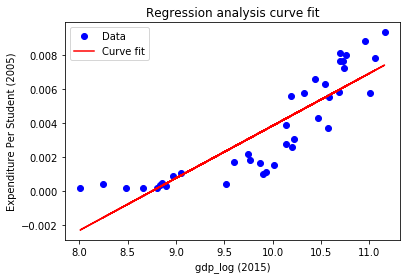

In [112]:
def fit_data_mat(df_data1, df_data2, degree, title, x_label, y_label):
    pylab.plot(df_data1, df_data2, 'bo', label='Data')
    pylab.title(title)
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    model = pylab.polyfit(df_data1, df_data2, degree)
    est_y_vals = pylab.polyval(model, df_data1)
    pylab.plot(df_data1, est_y_vals, 'r', label='Curve fit')
    pylab.legend(loc='best')
    pylab.show()

#plot with curve
line_consolidated_df_1 = fit_data_mat(consolidated_df_1 ['gdp_log'], consolidated_df_1 ['Expenditure Per Student'], 1,
                                       'Regression analysis curve fit', 'gdp_log (2015)',
                                   'Expenditure Per Student (2005)')


In [113]:
consolidated_df_1

consolidated_df_2 = consolidated_df_1.rename(columns={"Expenditure Per Student": "exp_per_student"})


import statsmodels.formula.api as smf
#perform OLS 
model_consolidated_df_1 = smf.ols(formula='gdp_log ~ exp_per_student', data=consolidated_df_2).fit()
model_consolidated_df_1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gdp_log   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     120.9
Date:                Wed, 22 Apr 2020   Prob (F-statistic):           3.26e-13
Time:                        05:06:25   Log-Likelihood:                -20.609
No. Observations:                  39   AIC:                             45.22
Df Residuals:                      37   BIC:                             48.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.0333      0.106     85.058      0.000       8.818       9.248
exp_per_student   248.8038     22.632     10.993      0.000     202.947     294.661
==============================================================================
Omnibus:                        0.724   Durbin-Watson:                   2.464
Prob(Omnibus):                  0.696   Jarque-Bera (JB):                0.694
Skew:                          -0.297   Prob(JB):                        0.707
Kurtosis:                       2.726   Cond. No.                         335.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
def get_codes_list(df_data):
    codes_list = df_data['LOCATION'].tolist()
    return codes_list

# function to get unique values 
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    return unique_list


countries_codes = unique(get_codes_list(basic_edu_exp))


<

### ```OLS linear regression```

In [206]:
from sklearn.model_selection import  train_test_split
from sklearn import preprocessing

X = consolidated_df_1_2['exp_per_student']

y = consolidated_df_1_2['gdp_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)



#X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

In [207]:
type(X_train)

pandas.core.series.Series

In [208]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [215]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_1,y_train_1)

# Make predictions using the testing set
y_pred = regr.predict(X_train_1)

In [214]:
X_train_1 = X_train.values.reshape(-1,1)
y_train_1 = y_train.values.reshape(-1,1)

In [216]:
y_pred

array([[ 9.09931144],
       [ 9.50229541],
       [ 9.13793245],
       [10.02166412],
       [11.00156338],
       [ 9.09241911],
       [ 9.7404735 ],
       [10.12269894],
       [ 9.27430649],
       [10.62864122],
       [ 9.158175  ],
       [ 9.33981199],
       [11.38436338],
       [ 9.69489811],
       [10.44351787],
       [10.50055323],
       [11.0823499 ],
       [ 9.59401933],
       [10.42888904],
       [ 9.42878641],
       [ 9.30792222],
       [ 9.47160122],
       [ 9.12253481],
       [ 9.10222557],
       [ 9.15507307],
       [ 9.48067659],
       [ 9.17340907],
       [10.97067906],
       [10.48903992],
       [ 9.81679015],
       [11.25013057]])

In [217]:
y_train_1

array([[ 8.65581125],
       [ 9.76967961],
       [ 8.83169223],
       [10.13507746],
       [11.0656164 ],
       [ 8.00697375],
       [10.13884721],
       [10.46817097],
       [ 8.96680068],
       [10.54101121],
       [ 9.51996811],
       [ 9.93622752],
       [11.16003246],
       [10.20429054],
       [10.18905882],
       [11.00716182],
       [10.69699638],
       [ 9.74091606],
       [10.5813032 ],
       [10.01042587],
       [ 9.9007355 ],
       [ 9.86493275],
       [ 8.89463063],
       [ 8.80159849],
       [ 8.23931912],
       [ 9.60286909],
       [ 8.8506569 ],
       [10.73177698],
       [10.32903089],
       [10.21865407],
       [10.95648662]])

In [218]:
#training Data
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))

Coefficients: 
 [[249.62178673]]
Mean squared error: 0.18
Coefficient of determination: 0.75


In [225]:
# Make predictions using the testing set
y_pred = regr.predict(X_test.values.reshape(-1,1))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Coefficients: 
 [[249.62178673]]
Mean squared error: 0.13
Coefficient of determination: 0.81


In [227]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
regr.score(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1))

0.806389712587362

In [101]:
def fit_data_mat(df_data1, df_data2, degree, title, x_label, y_label):
    """Plot data from df_data1 and df_data2 and try to fit a curve with a given degree using matplotlib.pyplot
    :param df_data1: data frame
    :param df_data2: data frame
    :param degree: integer
    :param x_label: string
    :param y_label: string"""
    pylab.plot(df_data1, df_data2, 'bo', label='Data')
    pylab.title(title)
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    model = pylab.polyfit(df_data1, df_data2, degree)
    est_y_vals = pylab.polyval(model, df_data1)
    pylab.plot(df_data1, est_y_vals, 'r', label='Curve fit')
    pylab.legend(loc='best')
    pylab.show()

#plot with curve
line_consolidated_df_1 = fit_data_mat(consolidated_df_1 ['gdp_ppp_2015'], consolidated_df_1 ['Expenditure Per Student'], 1,
                                       'Regression analysis curve fit', 'gdp_ppp_2015',
                                   'Expenditure Per Student')





In [102]:
consolidated_df_1

consolidated_df_1_2 = consolidated_df_1.rename(columns={"Expenditure Per Student": "exp_per_student"})


import statsmodels.formula.api as smf
#perform OLS 
model_consolidated_df_1 = smf.ols(formula='gdp_ppp_2015 ~ exp_per_student', data=consolidated_df_1_2).fit()
model_consolidated_df_1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp_ppp_2015   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     238.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.05e-17
Time:                        04:59:43   Log-Likelihood:                 34.836
No. Observations:                  39   AIC:                            -65.67
Df Residuals:                      37   BIC:                            -62.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0727      0.025      2.904      0.006       0.022       0.123
exp_per_student     0.7740      0.050     15.436      0.000       0.672       0.876
==============================================================================
Omnibus:                        6.246   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                4.865
Skew:                           0.786   Prob(JB):                       0.0878
Kurtosis:                       3.721   Cond. No.                         3.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
consolidated_df

In [ ]:
def fit_data_mat(df_data1, df_data2, degree, title, x_label, y_label):
    """Plot data from df_data1 and df_data2 and try to fit a curve with a given degree using matplotlib.pyplot
    :param df_data1: data frame
    :param df_data2: data frame
    :param degree: integer
    :param x_label: string
    :param y_label: string"""
    pylab.plot(df_data1, df_data2, 'bo', label='Data')
    pylab.title(title)
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    model = pylab.polyfit(df_data1, df_data2, degree)
    est_y_vals = pylab.polyval(model, df_data1)
    pylab.plot(df_data1, est_y_vals, 'r', label='Curve fit')
    pylab.legend(loc='best')
    pylab.show()

#plot with curve
line_consolidated_df_1 = fit_data_mat(consolidated_df ['gdp_ppp_2015'], consolidated_df ['Expenditure Per Student'], 1,
                                       'Regression analysis curve fit', 'gdp_ppp_2015',
                                   'Expenditure Per Student')





In [103]:
from sklearn.model_selection import  train_test_split
from sklearn import preprocessing

X = consolidated_df_1_2[['exp_per_student']]

y = consolidated_df_1_2[['gdp_ppp_2015']]

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)


In [104]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_train)


In [105]:
#training Data
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))


Coefficients: 
 [[0.80344058]]
Mean squared error: 0.01
Coefficient of determination: 0.87


In [106]:
# Make predictions using the testing set
y_pred = regr.predict(X_val)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))


Coefficients: 
 [[0.80344058]]
Mean squared error: 0.01
Coefficient of determination: 0.88


In [107]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

random_model = RandomForestRegressor(n_estimators =100,
 min_samples_split = 10,
 min_samples_leaf = 15,
 max_features= 'auto',
 max_depth = 20,
 bootstrap = True)
random_model.fit(X_train, y_train)
r2_score(y_train, random_model.predict(X_train))

print('R2 score for training data' ,r2_score(y_train, random_model.predict(X_train)))
print('R2 score for test data',r2_score(y_test, random_model.predict(X_test)))

      
print('Root mean square error score on training set',np.sqrt(mean_squared_error(y_train,random_model.predict(X_train))))
print('Root mean square error score on test set',np.sqrt(mean_squared_error(y_test,random_model.predict(X_test))))



R2 score for training data -3.757482382549249e-05
R2 score for test data -36.52095683540672
Root mean square error score on training set 0.2770870522472017
Root mean square error score on test set 0.21526368814751876


C:\Users\rohit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [108]:
from sklearn.ensemble import RandomForestRegressor


random_model = RandomForestRegressor(n_estimators =200,
 min_samples_split = 5,
 min_samples_leaf = 4,
 max_features= 'auto',
 max_depth = 10,
 bootstrap = True)
random_model.fit(X_train, y_train)
r2_score(y_train, random_model.predict(X_train))

print(r2_score(y_test, random_model.predict(X_test)))

rmse = np.sqrt(mean_squared_error(y_test,random_model.predict(X_test)))
print(rmse) 

-10.880382602807936
0.12112925271791132


C:\Users\rohit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


<html>  <center> <br> <br> <h1> Ends here <h1> <br> <br> <br>

In [30]:
basic_edu_exp_2005_1 = basic_edu_exp_2005.drop(['Indicator', 'Time', 'EDULIT_IND'], axis=1)

In [28]:
#basic_edu_exp_2005_1 = basic_edu_exp_2005.drop(['EDULIT_IND'], axis=1)

In [33]:
basic_edu_exp_2005_1

LOCATION    Country       Value
1         AUS  Australia   337.80961
17        AUT    Austria  1121.62167
31        BEL    Belgium  1928.32293
48        CZE    Czechia   856.47423
63        DNK    Denmark  1293.90365
...       ...        ...         ...
3841      SWZ  Swaziland    98.33014
3874      URY    Uruguay   193.97999
3894      AGO     Angola   446.08422
3901      ARG  Argentina  5262.68933
3929      COG      Congo    64.76203

[223 rows x 3 columns]

In [172]:
gov_edu_expenses = pd.read_csv('gov_exp_edu_ppp.csv')

In [173]:
gov_edu_expenses

EDULIT_IND                                          Indicator  \
0            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
1            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
2            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
3            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
4            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
...                  ...                                                ...   
13184      X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
13185      X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
13186  X_PPP_2T4_V_FSGOV  Government expenditure on secondary and post-s...   
13187      X_PPP_3_FSGOV  Government expenditure on upper secondary educ...   
13188      X_PPP_3_FSGOV  Government expenditure on upper secondary educ...   

      LOCATION      Country  TIME  Time        Value Flag Codes Flags  
0          AUS    Australia  2000  2000  24725.62465        NaN   NaN  
1          AUS    Australia  2005  2005  32622.18048        NaN   NaN  
2          AUS    Australia  2006  2006  33710.66280        NaN   NaN  
3          AUS    Australia  2007  2007  35497.95717        NaN   NaN  
4          AUS    Australia  2008  2008  36915.62215        NaN   NaN  
...        ...          ...   ...   ...          ...        ...   ...  
13184      BEL      Belgium  2013  2013   4366.54830        NaN   NaN  
13185      BEL      Belgium  2014  2014   4498.83049        NaN   NaN  
13186      CHE  Switzerland  2014  2014   2739.82109        NaN   NaN  
13187      BEL      Belgium  2013  2013   9259.90169        NaN   NaN  
13188      BEL      Belgium  2014  2014   9422.75997        NaN   NaN  

[13189 rows x 9 columns]

In [174]:
def filter_by_indicator(df_data, indicators):
    """Take df_data and select rows for given indicators, then append it to df_data_ind
    :param df_data: data frame
    :param indicators: list"""
    df_data_ind = pd.DataFrame()
    for i in indicators:
        df_data_ind = df_data_ind.append(df_data.loc[df_data['EDULIT_IND'] == i], ignore_index=True)
    return df_data_ind

#select indicators: pre-primary, primary and lower secondary
basic_edu_exp = filter_by_indicator(gov_edu_expenses, ['X_PPP_02_FSGOV', 'X_PPP_1_FSGOV', 'X_PPP_2_FSGOV'])

def drop_columns(df_data, del_col):
    """Take df_data and drop del_col columns from it
    :param df_data: data frame
    :param del_col: list"""
    for i in del_col:
        df_data.drop(i, axis=1, inplace=True)

#drop unnecessary column
drop_columns(basic_edu_exp, ['TIME', 'Flag Codes', 'Flags'])

In [175]:
basic_edu_exp.head()

EDULIT_IND                                          Indicator LOCATION  \
0  X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...      AUS   
1  X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...      AUS   
2  X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...      AUS   
3  X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...      AUS   
4  X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...      AUS   

     Country  Time      Value  
0  Australia  2000  305.81718  
1  Australia  2005  337.80961  
2  Australia  2006  343.28577  
3  Australia  2007  329.08133  
4  Australia  2008  344.47252

In [176]:
def get_codes_list(df_data):
    """Create a list of countries codes from column Code in df_data
    change code for OECD members from OAVG to OED
    :param df_data: data frame
    :returns codes_list: list"""
    codes_list = df_data['LOCATION'].tolist()
#    codes_list.remove('OAVG')
#    codes_list.append('OED')
    return codes_list

#get list of countries, who took PISA test
countries_codes = get_codes_list(basic_edu_exp)

In [178]:
def create_name_code_dict():
    """Use pycountry library to create a map for converting from country name to country code
    :returns name_code_dict: dictionary"""
    name_code_dict = {country.name: country.alpha_3 for country in pycountry.countries}
    dict_adjust = {'Czech Republic': 'CZE', 'Hong Kong SAR, China': 'HKG', 'Korea, Rep.': 'KOR',
                      'Macao SAR, China': 'MAC', 'OECD members': 'OED', 'Slovak Republic': 'SVK',
                  'China, Hong Kong Special Administrative Region': 'HKG', 'China, Macao Special Administrative Region': 'MAC',
                  'Republic of Korea': 'KOR', 'United Kingdom of Great Britain and Northern Ireland': 'GBR',
                  'United States of America': 'USA', 'OECD members': 'OAVG'}
    name_code_dict.update(dict_adjust)
    return name_code_dict

#name_code_dict = name_code_dict


#pivot df to get similar structure like student_count_data
basic_edu_exp = basic_edu_exp.pivot_table('Value', ['Country', 'Time'], 'EDULIT_IND')

#reset multiindex "Country' and 'Time'
basic_edu_exp.reset_index(level=['Country', 'Time'], inplace=True)

#rename column labels
rename_columns(basic_edu_exp,
                {'X_PPP_02_FSGOV': 'pre_primary_exp', 'X_PPP_1_FSGOV': 'primary_exp', 'X_PPP_2_FSGOV': 'lower_sec_exp'})

#add new column with country code
add_country_code(basic_edu_exp, name_code_dict)

KeyError: 'Bolivia (Plurinational State of)'

In [177]:
basic_edu_exp

EDULIT_IND                                          Indicator  \
0     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
1     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
2     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
3     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
4     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
...              ...                                                ...   
4003   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
4004   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
4005   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
4006   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
4007   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   

     LOCATION      Country  Time       Value  
0         AUS    Australia  2000   305.81718  
1         AUS    Australia  2005   337.80961  
2         AUS    Australia  2006   343.28577  
3         AUS    Australia  2007   329.08133  
4         AUS    Australia  2008   344.47252  
...       ...          ...   ...         ...  
4003      SSD  South Sudan  2014    20.88986  
4004      SSD  South Sudan  2015    20.50275  
4005      SSD  South Sudan  2016    13.83317  
4006      BEL      Belgium  2013  4366.54830  
4007      BEL      Belgium  2014  4498.83049  

[4008 rows x 6 columns]

In [166]:
add_country_code(basic_edu_exp, name_code_dict)

KeyError: 'Bolivia (Plurinational State of)'

In [167]:
name_code_dict

{'Aruba': 'ABW',
 'Afghanistan': 'AFG',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Åland Islands': 'ALA',
 'Albania': 'ALB',
 'Andorra': 'AND',
 'United Arab Emirates': 'ARE',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'American Samoa': 'ASM',
 'Antarctica': 'ATA',
 'French Southern Territories': 'ATF',
 'Antigua and Barbuda': 'ATG',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Burundi': 'BDI',
 'Belgium': 'BEL',
 'Benin': 'BEN',
 'Bonaire, Sint Eustatius and Saba': 'BES',
 'Burkina Faso': 'BFA',
 'Bangladesh': 'BGD',
 'Bulgaria': 'BGR',
 'Bahrain': 'BHR',
 'Bahamas': 'BHS',
 'Bosnia and Herzegovina': 'BIH',
 'Saint Barthélemy': 'BLM',
 'Belarus': 'BLR',
 'Belize': 'BLZ',
 'Bermuda': 'BMU',
 'Bolivia, Plurinational State of': 'BOL',
 'Brazil': 'BRA',
 'Barbados': 'BRB',
 'Brunei Darussalam': 'BRN',
 'Bhutan': 'BTN',
 'Bouvet Island': 'BVT',
 'Botswana': 'BWA',
 'Central African Republic': 'CAF',
 'Canada': 'CAN',
 'Cocos (Keeling) Islands': 'CCK',
 'Switzerland': 'CHE',
 

In [35]:
def create_name_code_dict():
    """Use pycountry library to create a map for converting from country name to country code
    :returns name_code_dict: dictionary"""
    name_code_dict = {country.name: country.alpha_3 for country in pycountry.countries}
    dict_adjust = {'Czech Republic': 'CZE', 'Hong Kong SAR, China': 'HKG', 'Korea, Rep.': 'KOR',
                      'Macao SAR, China': 'MAC', 'OECD members': 'OED', 'Slovak Republic': 'SVK',
                  'China, Hong Kong Special Administrative Region': 'HKG', 'China, Macao Special Administrative Region': 'MAC',
                  'Republic of Korea': 'KOR', 'United Kingdom of Great Britain and Northern Ireland': 'GBR',
                  'United States of America': 'USA', 'OECD members': 'OAVG'}
    name_code_dict.update(dict_adjust)
    return name_code_dict

def reverse_dict(dictionary):
    """Reverse other map for converting from country code to country name
    :param dictionary: dictionary
    :returns reversed_dict: dictionary"""
    reversed_dict = dict(zip(dictionary.values(), dictionary.keys()))
    return reversed_dict

def add_country_name(df_data, code_name_dict):
    """Take df_data, add a column with country name and fill it using code_name_dict
    :param df_data: data frame
    :param code_name_dict: dictionary"""
    mapper = lambda x: code_name_dict[x]
    df_data.insert(loc=0, column='Country', value=df_data.loc[:, 'Code'].copy())
    df_data['Country'] = df_data['Country'].apply(mapper)



In [169]:
name_code_dict = {country.name: country.alpha_3 for country in pycountry.countries}

In [170]:
type(name_code_dict)

dict

In [171]:
#my_map = pd.Series(df.alpha_3_code.values,index=df.en_short_name)
my_map = df.set_index('en_short_name')['alpha_3_code']

df2['Nationality_Codes'] = df2['Reviewer_Nationality'].map(my_map)

KeyError: "None of ['en_short_name'] are in the columns"

In [104]:
name_code  = pd.DataFrame.from_dict(name_code_dict, orient='index')

In [105]:
name_code.reset_index(level=0, inplace=True)

In [113]:
name_code.rename(columns={0: 'Code'}, inplace=True)

In [116]:
name_code_1 = name_code

In [117]:
name_code_1

Country Code
0            Aruba  ABW
1      Afghanistan  AFG
2           Angola  AGO
3         Anguilla  AIA
4    Åland Islands  ALA
..             ...  ...
244          Samoa  WSM
245          Yemen  YEM
246   South Africa  ZAF
247         Zambia  ZMB
248       Zimbabwe  ZWE

[249 rows x 2 columns]

In [119]:
my_map = name_code_1.set_index('Country')['Code']



In [122]:
gov_edu_expenses_1['Code'] = gov_edu_expenses_1['Country'].map(my_map)

In [120]:
gov_edu_expenses_1 = gov_edu_expenses

In [123]:
gov_edu_expenses_1

EDULIT_IND                                          Indicator  \
0            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
1            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
2            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
3            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
4            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
...                  ...                                                ...   
13184      X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
13185      X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
13186  X_PPP_2T4_V_FSGOV  Government expenditure on secondary and post-s...   
13187      X_PPP_3_FSGOV  Government expenditure on upper secondary educ...   
13188      X_PPP_3_FSGOV  Government expenditure on upper secondary educ...   

      LOCATION      Country  TIME  Time        Value Flag Codes Flags Code  
0          AUS    Australia  2000  2000  24725.62465        NaN   NaN  AUS  
1          AUS    Australia  2005  2005  32622.18048        NaN   NaN  AUS  
2          AUS    Australia  2006  2006  33710.66280        NaN   NaN  AUS  
3          AUS    Australia  2007  2007  35497.95717        NaN   NaN  AUS  
4          AUS    Australia  2008  2008  36915.62215        NaN   NaN  AUS  
...        ...          ...   ...   ...          ...        ...   ...  ...  
13184      BEL      Belgium  2013  2013   4366.54830        NaN   NaN  BEL  
13185      BEL      Belgium  2014  2014   4498.83049        NaN   NaN  BEL  
13186      CHE  Switzerland  2014  2014   2739.82109        NaN   NaN  CHE  
13187      BEL      Belgium  2013  2013   9259.90169        NaN   NaN  BEL  
13188      BEL      Belgium  2014  2014   9422.75997        NaN   NaN  BEL  

[13189 rows x 10 columns]

In [124]:
drop_columns(gov_edu_expenses_1, ['TIME', 'Flag Codes', 'Flags'])

In [125]:
gov_edu_expenses_1

EDULIT_IND                                          Indicator  \
0            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
1            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
2            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
3            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
4            X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...   
...                  ...                                                ...   
13184      X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
13185      X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
13186  X_PPP_2T4_V_FSGOV  Government expenditure on secondary and post-s...   
13187      X_PPP_3_FSGOV  Government expenditure on upper secondary educ...   
13188      X_PPP_3_FSGOV  Government expenditure on upper secondary educ...   

      LOCATION      Country  Time        Value Code  
0          AUS    Australia  2000  24725.62465  AUS  
1          AUS    Australia  2005  32622.18048  AUS  
2          AUS    Australia  2006  33710.66280  AUS  
3          AUS    Australia  2007  35497.95717  AUS  
4          AUS    Australia  2008  36915.62215  AUS  
...        ...          ...   ...          ...  ...  
13184      BEL      Belgium  2013   4366.54830  BEL  
13185      BEL      Belgium  2014   4498.83049  BEL  
13186      CHE  Switzerland  2014   2739.82109  CHE  
13187      BEL      Belgium  2013   9259.90169  BEL  
13188      BEL      Belgium  2014   9422.75997  BEL  

[13189 rows x 7 columns]

In [128]:
column_values = gov_edu_expenses_1[["Code"]]
#unique_values =  np.unique(column_values)

In [149]:
column_values

column_values_1 = column_values.Code.unique()

In [131]:
col_one_list = gov_edu_expenses_1['Code'].tolist()

In [132]:
col_one_list

['AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'CAN',
 'CAN',
 'CAN',
 'CAN',
 'CAN',
 'CAN',
 'CAN',
 'CAN',
 'CAN',
 'CAN',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'DEU',
 'DEU',
 'DEU',
 'DEU',
 'DEU',
 'DEU',
 'DEU',
 'DEU',
 'DEU',
 'GRC',
 'GRC',
 'GRC',
 'GRC',
 'GRC',


In [134]:
# function to get unique values 
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    return unique_list

In [135]:
country_codes = unique(col_one_list)

In [137]:


cleanedList = [x for x in country_codes if str(x) != 'nan']

In [140]:
len(cleanedList)

176

In [152]:
#read in file with student count for given countries
edu_indicators = {'SP.PRE.TOTL.IN':'pre_primary_pop', 'SP.PRM.TOTL.IN':'primary_pop', 'SP.SEC.LTOT.IN':'lower_sec_pop'}
basic_student_pop = load_from_wbdata({}, edu_indicators, 2003, 2014)

In [142]:
basic_student_pop

pre_primary_pop  primary_pop  \
country                          date                                 
Global Partnership for Education 2014              NaN          NaN   
                                 2013              NaN          NaN   
                                 2012              NaN          NaN   
                                 2011              NaN          NaN   
                                 2010              NaN          NaN   
...                                                ...          ...   
Zimbabwe                         2007         682545.0    2245701.0   
                                 2006         672994.0    2242521.0   
                                 2005         665870.0    2251272.0   
                                 2004         663911.0    2255057.0   
                                 2003         660686.0    2263561.0   

                                       lower_sec_pop  
country                          date                 
Global Partnership for Education 2014            NaN  
                                 2013            NaN  
                                 2012            NaN  
                                 2011            NaN  
                                 2010            NaN  
...                                              ...  
Zimbabwe                         2007       621977.0  
                                 2006       629189.0  
                                 2005       640458.0  
                                 2004       644965.0  
                                 2003       651993.0  

[3216 rows x 3 columns]

In [153]:
#reset multiindex
basic_student_pop.reset_index(level=['country', 'date'], inplace=True)

#rename column labels
rename_columns(basic_student_pop, {'country': 'Country', 'date': 'Time'})

#change column order
basic_student_pop = basic_student_pop[['Country', 'Time', 'pre_primary_pop', 'primary_pop', 'lower_sec_pop']]

In [154]:
basic_student_pop

Country  Time  pre_primary_pop  primary_pop  \
0     Global Partnership for Education  2014              NaN          NaN   
1     Global Partnership for Education  2013              NaN          NaN   
2     Global Partnership for Education  2012              NaN          NaN   
3     Global Partnership for Education  2011              NaN          NaN   
4     Global Partnership for Education  2010              NaN          NaN   
...                                ...   ...              ...          ...   
3211                          Zimbabwe  2007         682545.0    2245701.0   
3212                          Zimbabwe  2006         672994.0    2242521.0   
3213                          Zimbabwe  2005         665870.0    2251272.0   
3214                          Zimbabwe  2004         663911.0    2255057.0   
3215                          Zimbabwe  2003         660686.0    2263561.0   

      lower_sec_pop  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
...             ...  
3211       621977.0  
3212       629189.0  
3213       640458.0  
3214       644965.0  
3215       651993.0  

[3216 rows x 5 columns]

In [147]:
results = list(map(int, cleanedList))

cleanedList

ValueError: invalid literal for int() with base 10: 'AUS'

In [159]:
# importing pandas as pd 
import pandas as pd 
  
# Creating the dataframe  
df = pd.DataFrame({"A":[12, 4, 5, None, None, 1], 
                   "B":[None, 2, 54, 3, None,None], 
                   "C":[20, 16, None, None,3, 8], 
                   "D":[14, 3, None, None, None, 6]}) 
  
# to interpolate the missing values 
df.interpolate(method ='linear', limit_direction ='both', limit = 1) 

A     B          C      D
0  12.000000   2.0  20.000000  14.00
1   4.000000   2.0  16.000000   3.00
2   5.000000  54.0  11.666667   3.75
3   3.666667   3.0   7.333333    NaN
4   2.333333   3.0   3.000000   5.25
5   1.000000   NaN   8.000000   6.00

In [155]:
#add new column with country code
add_country_code(basic_student_pop, column_values_1)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [88]:
def create_name_code_dict():
    """Use pycountry library to create a map for converting from country name to country code
    :returns name_code_dict: dictionary"""
    name_code_dict = {country.name: country.alpha_3 for country in pycountry.countries}
    dict_adjust = {'Czech Republic': 'CZE', 'Hong Kong SAR, China': 'HKG', 'Korea, Rep.': 'KOR',
                      'Macao SAR, China': 'MAC', 'OECD members': 'OED', 'Slovak Republic': 'SVK',
                  'China, Hong Kong Special Administrative Region': 'HKG', 'China, Macao Special Administrative Region': 'MAC',
                  'Republic of Korea': 'KOR', 'United Kingdom of Great Britain and Northern Ireland': 'GBR',
                  'United States of America': 'USA', 'OECD members': 'OAVG'}
    name_code_dict.update(dict_adjust)
    return name_code_dict
name_code_dict  = create_name_code_dict

In [33]:
def rename_columns(df_data, new_col):
    """Take df_data data frame and rename new_col columns
    :param df_data: data frame
    :param new_col: dictionary"""
    df_data.rename(columns=new_col, inplace=True)

In [12]:
basic_edu_exp # = basic_edu_exp.pivot_table('Value', ['Country', 'Time'], 'EDULIT_IND')

EDULIT_IND      Country  Time  X_PPP_02_FSGOV  X_PPP_1_FSGOV  X_PPP_2_FSGOV
0           Afghanistan  2010             NaN      979.95390      267.11242
1           Afghanistan  2011             NaN     1051.20179      286.53292
2           Afghanistan  2012             NaN      858.04919      233.88405
3           Afghanistan  2013             NaN     1241.09542      338.29341
4           Afghanistan  2014             NaN     1371.74324      373.90494
...                 ...   ...             ...            ...            ...
1537             Zambia  2005             NaN      276.30185            NaN
1538           Zimbabwe  2010             NaN      193.56055            NaN
1539           Zimbabwe  2012        40.47741      962.22673      260.14203
1540           Zimbabwe  2013        43.88717     1026.27920      285.89831
1541           Zimbabwe  2014        46.79414     1105.23929      303.15381

[1542 rows x 5 columns]

In [27]:
basic_edu_exp = basic_edu_exp.pivot_table('Value', ['Country', 'Time'], 'EDULIT_IND')

In [28]:
#reset multiindex "Country' and 'Time'
basic_edu_exp.reset_index(level=['Country', 'Time'], inplace=True)


In [29]:
#rename column labels
rename_columns(basic_edu_exp,
                {'X_PPP_02_FSGOV': 'pre_primary_exp', 'X_PPP_1_FSGOV': 'primary_exp', 'X_PPP_2_FSGOV': 'lower_sec_exp'})


In [34]:
#add new column with country code
add_country_code(basic_edu_exp, name_code_dict)

NameError: name 'add_country_code' is not defined

In [18]:
basic_edu_exp.reset_index(level=0, inplace=True)

In [36]:
basic_edu_exp

EDULIT_IND      Country  Time  pre_primary_exp  primary_exp  lower_sec_exp
0           Afghanistan  2010              NaN    979.95390      267.11242
1           Afghanistan  2011              NaN   1051.20179      286.53292
2           Afghanistan  2012              NaN    858.04919      233.88405
3           Afghanistan  2013              NaN   1241.09542      338.29341
4           Afghanistan  2014              NaN   1371.74324      373.90494
...                 ...   ...              ...          ...            ...
1537             Zambia  2005              NaN    276.30185            NaN
1538           Zimbabwe  2010              NaN    193.56055            NaN
1539           Zimbabwe  2012         40.47741    962.22673      260.14203
1540           Zimbabwe  2013         43.88717   1026.27920      285.89831
1541           Zimbabwe  2014         46.79414   1105.23929      303.15381

[1542 rows x 5 columns]

In [55]:
gov_edu_expenses = pd.read_csv('gov_exp_edu_ppp.csv')

In [56]:
gov_edu_expenses.head()

EDULIT_IND                                          Indicator LOCATION  \
0  X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...      AUS   
1  X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...      AUS   
2  X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...      AUS   
3  X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...      AUS   
4  X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...      AUS   

     Country  TIME  Time        Value Flag Codes Flags  
0  Australia  2000  2000  24725.62465        NaN   NaN  
1  Australia  2005  2005  32622.18048        NaN   NaN  
2  Australia  2006  2006  33710.66280        NaN   NaN  
3  Australia  2007  2007  35497.95717        NaN   NaN  
4  Australia  2008  2008  36915.62215        NaN   NaN

In [57]:
def filter_by_indicator(df_data, indicators):
    """Take df_data and select rows for given indicators, then append it to df_data_ind
    :param df_data: data frame
    :param indicators: list"""
    df_data_ind = pd.DataFrame()
    for i in indicators:
        df_data_ind = df_data_ind.append(df_data.loc[df_data['EDULIT_IND'] == i], ignore_index=True)
    return df_data_ind

#select indicators: pre-primary, primary and lower secondary
basic_edu_exp = filter_by_indicator(gov_edu_expenses, ['X_PPP_02_FSGOV', 'X_PPP_1_FSGOV', 'X_PPP_2_FSGOV'])

def drop_columns(df_data, del_col):
    """Take df_data and drop del_col columns from it
    :param df_data: data frame
    :param del_col: list"""
    for i in del_col:
        df_data.drop(i, axis=1, inplace=True)

#drop unnecessary column
drop_columns(basic_edu_exp, ['TIME', 'Flag Codes', 'Flags'])

In [115]:
gov_edu_expenses.head()

EDULIT_IND                                          Indicator LOCATION  \
0  X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...      AUS   
1  X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...      AUS   
2  X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...      AUS   
3  X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...      AUS   
4  X_PPP_FSGOV  Government expenditure on education, PPP$ (mil...      AUS   

     Country  TIME  Time        Value Flag Codes Flags  
0  Australia  2000  2000  24725.62465        NaN   NaN  
1  Australia  2005  2005  32622.18048        NaN   NaN  
2  Australia  2006  2006  33710.66280        NaN   NaN  
3  Australia  2007  2007  35497.95717        NaN   NaN  
4  Australia  2008  2008  36915.62215        NaN   NaN

In [59]:
def filter_by_year(df_data, year):
    """Create a copy of df_data and extract rows for a given year
    :param df_data: data frame
    :param year: string
    :returns df_data_year: data frame"""
    df_data_year = df_data.xs(year, level='date').copy()
    return df_data_year

#get GDP PPP for 2015
#gdp_ppp_2015 = filter_by_year(gdp_ppp, '2015')

#reset index "country'
#gdp_ppp_2015.reset_index(level=['country'], inplace=True)

#rename column label
#rename_columns(gdp_ppp_2015, {'country': 'Country'})

def add_country_code(df_data, name_code_dict):
    """Take df_data, add a column with country code and fill it using name_code_dict
    :param df_data: data frame
    :param name_code_dict: dictionary"""
    mapper = lambda x: name_code_dict[x]
    df_data.insert(loc=1, column='Code', value=df_data.loc[:, 'Country'].copy())
    df_data['Code'] = df_data['Code'].apply(mapper)



In [60]:
#pivot df to get similar structure like student_count_data
basic_edu_exp = basic_edu_exp.pivot_table('Value', ['Country', 'Time'], 'EDULIT_IND')

#reset multiindex "Country' and 'Time'
basic_edu_exp.reset_index(level=['Country', 'Time'], inplace=True)

#rename column labels
rename_columns(basic_edu_exp,
                {'X_PPP_02_FSGOV': 'pre_primary_exp', 'X_PPP_1_FSGOV': 'primary_exp', 'X_PPP_2_FSGOV': 'lower_sec_exp'})

#add new column with country code
#add_country_code(basic_edu_exp, name_code_dict)

In [61]:
basic_edu_exp

EDULIT_IND      Country  Time  pre_primary_exp  primary_exp  lower_sec_exp
0           Afghanistan  2010              NaN    979.95390      267.11242
1           Afghanistan  2011              NaN   1051.20179      286.53292
2           Afghanistan  2012              NaN    858.04919      233.88405
3           Afghanistan  2013              NaN   1241.09542      338.29341
4           Afghanistan  2014              NaN   1371.74324      373.90494
...                 ...   ...              ...          ...            ...
1537             Zambia  2005              NaN    276.30185            NaN
1538           Zimbabwe  2010              NaN    193.56055            NaN
1539           Zimbabwe  2012         40.47741    962.22673      260.14203
1540           Zimbabwe  2013         43.88717   1026.27920      285.89831
1541           Zimbabwe  2014         46.79414   1105.23929      303.15381

[1542 rows x 5 columns]

In [63]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multi index data frame
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

In [68]:
#read in file with student count for given countries
edu_indicators = {'SP.PRE.TOTL.IN':'pre_primary_pop', 'SP.PRM.TOTL.IN':'primary_pop', 'SP.SEC.LTOT.IN':'lower_sec_pop'}
basic_student_pop = load_from_wbdata({},edu_indicators, 2003, 2014)

In [69]:
basic_student_pop

pre_primary_pop  primary_pop  \
country                          date                                 
Global Partnership for Education 2014              NaN          NaN   
                                 2013              NaN          NaN   
                                 2012              NaN          NaN   
                                 2011              NaN          NaN   
                                 2010              NaN          NaN   
...                                                ...          ...   
Zimbabwe                         2007         682545.0    2245701.0   
                                 2006         672994.0    2242521.0   
                                 2005         665870.0    2251272.0   
                                 2004         663911.0    2255057.0   
                                 2003         660686.0    2263561.0   

                                       lower_sec_pop  
country                          date                 
Global Partnership for Education 2014            NaN  
                                 2013            NaN  
                                 2012            NaN  
                                 2011            NaN  
                                 2010            NaN  
...                                              ...  
Zimbabwe                         2007       621977.0  
                                 2006       629189.0  
                                 2005       640458.0  
                                 2004       644965.0  
                                 2003       651993.0  

[3216 rows x 3 columns]

In [66]:
def get_codes_list(df_data):
    """Create a list of countries codes from column Code in df_data
    change code for OECD members from OAVG to OED
    :param df_data: data frame
    :returns codes_list: list"""
    codes_list = df_data['Code'].tolist()
    codes_list.remove('OAVG')
    codes_list.append('OED')
    return codes_list

#get list of countries, who took PISA test
#countries_codes = get_codes_list(all_pisa_2015)

<html> <center> <br> <br> New Stuff<br> <br><br> <br><br> <br>
    

<html> <center> <br><br> Calculate Govt Expenditure on 3 sections <br><br>

In [333]:
gov_edu_expenses = pd.read_csv('gov_exp_edu_ppp.csv')

In [334]:
def filter_by_indicator(df_data, indicators):
    """Take df_data and select rows for given indicators, then append it to df_data_ind
    :param df_data: data frame
    :param indicators: list"""
    df_data_ind = pd.DataFrame()
    for i in indicators:
        df_data_ind = df_data_ind.append(df_data.loc[df_data['EDULIT_IND'] == i], ignore_index=True)
    return df_data_ind

#select indicators: pre-primary, primary and lower secondary
basic_edu_exp = filter_by_indicator(gov_edu_expenses, ['X_PPP_02_FSGOV', 'X_PPP_1_FSGOV', 'X_PPP_2_FSGOV'])

def drop_columns(df_data, del_col):
    """Take df_data and drop del_col columns from it
    :param df_data: data frame
    :param del_col: list"""
    for i in del_col:
        df_data.drop(i, axis=1, inplace=True)

#drop unnecessary column
drop_columns(basic_edu_exp, ['TIME', 'Flag Codes', 'Flags'])

In [335]:
basic_edu_exp

EDULIT_IND                                          Indicator  \
0     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
1     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
2     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
3     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
4     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
...              ...                                                ...   
4003   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
4004   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
4005   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
4006   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
4007   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   

     LOCATION      Country  Time       Value  
0         AUS    Australia  2000   305.81718  
1         AUS    Australia  2005   337.80961  
2         AUS    Australia  2006   343.28577  
3         AUS    Australia  2007   329.08133  
4         AUS    Australia  2008   344.47252  
...       ...          ...   ...         ...  
4003      SSD  South Sudan  2014    20.88986  
4004      SSD  South Sudan  2015    20.50275  
4005      SSD  South Sudan  2016    13.83317  
4006      BEL      Belgium  2013  4366.54830  
4007      BEL      Belgium  2014  4498.83049  

[4008 rows x 6 columns]

In [336]:
def get_codes_list(df_data):
    """Create a list of countries codes from column Code in df_data
    change code for OECD members from OAVG to OED
    :param df_data: data frame
    :returns codes_list: list"""
    codes_list = df_data['LOCATION'].tolist()
#    codes_list.remove('OAVG')
#    codes_list.append('OED')
    return codes_list

#get list of countries, who took PISA test
countries_codes = get_codes_list(basic_edu_exp)

In [337]:
countries_codes

['AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUS',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'AUT',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'BEL',
 'CAN',
 'CAN',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'CZE',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'DNK',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FIN',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'FRA',
 'DEU',
 'DEU',
 'DEU',
 'DEU',
 'DEU',
 'DEU',
 'DEU',
 'DEU',
 'DEU',
 'HUN',
 'HUN',
 'HUN',
 'HUN',
 'HUN',
 'HUN',
 'HUN',
 'HUN',
 'HUN',
 'HUN',
 'HUN',
 'HUN',
 'HUN',
 'HUN',


In [338]:
# function to get unique values 
def unique(list1): 
  
    # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    # print list 
    return unique_list

In [339]:
country_codes = unique(countries_codes)

In [340]:
country_codes.remove('VAT')

In [341]:
country_codes

['AUS',
 'AUT',
 'BEL',
 'CAN',
 'CZE',
 'DNK',
 'FIN',
 'FRA',
 'DEU',
 'HUN',
 'ISL',
 'IRL',
 'ITA',
 'JPN',
 'KOR',
 'LUX',
 'MEX',
 'NLD',
 'NZL',
 'NOR',
 'POL',
 'PRT',
 'SVK',
 'ESP',
 'SWE',
 'CHE',
 'TUR',
 'GBR',
 'USA',
 'AFG',
 'ARG',
 'ARM',
 'AZE',
 'BGD',
 'BRB',
 'BLR',
 'BLZ',
 'BEN',
 'BMU',
 'BTN',
 'BOL',
 'BRA',
 'BRN',
 'BGR',
 'BDI',
 'KHM',
 'CMR',
 'CAF',
 'TCD',
 'CHL',
 'CHN',
 'COL',
 'COM',
 'COG',
 'CRI',
 'CIV',
 'HRV',
 'CUB',
 'CYP',
 'COD',
 'DJI',
 'DMA',
 'DOM',
 'SLV',
 'ERI',
 'EST',
 'FJI',
 'GMB',
 'GEO',
 'GHA',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HND',
 'HKG',
 'IND',
 'IDN',
 'IRN',
 'ISR',
 'JAM',
 'JOR',
 'KAZ',
 'KEN',
 'KWT',
 'KGZ',
 'LAO',
 'LVA',
 'LSO',
 'LTU',
 'MDG',
 'MWI',
 'MYS',
 'MDV',
 'MLI',
 'MLT',
 'MRT',
 'MUS',
 'MDA',
 'MNG',
 'MAR',
 'NAM',
 'NPL',
 'NIC',
 'NER',
 'OMN',
 'PAN',
 'PRY',
 'PER',
 'PHL',
 'PRI',
 'ROU',
 'RUS',
 'RWA',
 'LCA',
 'VCT',
 'WSM',
 'SMR',
 'STP',
 'SEN',
 'SYC',
 'SLE',
 'SVN',
 'ZAF',
 'LKA',


In [342]:
cc = ['AUS',
 'AUT',
 'BEL',
 'CAN',
 'CZE',
 'DNK',
 'FIN',
 'FRA',
 'DEU',
 'HUN',
 'ISL',
 'IRL',
 'ITA',
 'JPN',
 'KOR',
 'LUX',
 'MEX',
 'NLD',
 'NZL',
 'NOR',
 'POL',
 'PRT',
 'SVK',
 'ESP',
 'SWE',
 'CHE',
 'TUR',
 'GBR',
 'USA',
 'AFG',
 'ARG',
 'CHN',
 'COL',
 'COM',
 'COG',
 'CRI',
 'CIV',
 'HRV',
 'CUB',
 'CYP',
 'COD',
 'DJI',
 'DMA',
 'DOM',
 'SLV',
 'ERI',
 'EST',
 'FJI',
 'GMB',
 'GEO',
 'GHA',
 'GTM',
 'GIN',
 'GNB',
 'GUY',
 'HND',
 'HKG',
 'IND',
 'IDN',
 'IRN',
 'ISR',
 'ZMB',
 'ZWE',
 'SRB',
 'AGO',
 'ATG',
 'BHR',
 'VGB',
 'BFA',
 'CPV',
 'CYM',
 'ECU',
 'ETH',
 'GAB',
 'GRD',
 'MOZ',
 'PLW',
 'QAT',
 'KNA',
 'SGP',
 'TZA',
 'UKR',
 'VNM',
 'YEM',
 'MAC',
 'SSD',
 'BWA',
 'TKM',
 'MHL',
 'DZA',
 'PAK',
 'SAU',
 'KIR',
 'LBR',
 'ALB']

In [343]:
df = basic_edu_exp[['Country', 'Time', 'Value']].describe()

In [344]:
df.isna().sum()

Time     0
Value    0
dtype: int64

In [345]:
basic_edu_exp_2005 = basic_edu_exp.query('Time == 2005')

In [356]:
basic_edu_exp_2005

EDULIT_IND                                          Indicator  \
1     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
17    X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
31    X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
48    X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
63    X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
...              ...                                                ...   
3841   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
3874   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
3894   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
3901   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
3929   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   

     LOCATION    Country  Time       Value  
1         AUS  Australia  2005   337.80961  
17        AUT    Austria  2005  1121.62167  
31        BEL    Belgium  2005  1928.32293  
48        CZE    Czechia  2005   856.47423  
63        DNK    Denmark  2005  1293.90365  
...       ...        ...   ...         ...  
3841      SWZ  Swaziland  2005    98.33014  
3874      URY    Uruguay  2005   193.97999  
3894      AGO     Angola  2005   446.08422  
3901      ARG  Argentina  2005  5262.68933  
3929      COG      Congo  2005    64.76203  

[223 rows x 6 columns]

In [353]:
basic_edu_exp_2005[['Indicator']]

Indicators = basic_edu_exp_2005['Indicator'].tolist()

In [354]:
Indicators = unique(Indicators)

In [355]:
Indicators

['Government expenditure on pre-primary education, PPP$ (millions)',
 'Government expenditure on primary education, PPP$ (millions)',
 'Government expenditure on lower secondary education, PPP$ (millions)']

<html> <center> <br><br> Calculate Govt Expenditure (Total) <br><br>

In [360]:
basic_edu_exp_2005_1 = basic_edu_exp_2005

In [361]:
basic_edu_exp_2005_1

EDULIT_IND                                          Indicator  \
1     X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
17    X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
31    X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
48    X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
63    X_PPP_02_FSGOV  Government expenditure on pre-primary educatio...   
...              ...                                                ...   
3841   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
3874   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
3894   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
3901   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   
3929   X_PPP_2_FSGOV  Government expenditure on lower secondary educ...   

     LOCATION    Country  Time       Value  
1         AUS  Australia  2005   337.80961  
17        AUT    Austria  2005  1121.62167  
31        BEL    Belgium  2005  1928.32293  
48        CZE    Czechia  2005   856.47423  
63        DNK    Denmark  2005  1293.90365  
...       ...        ...   ...         ...  
3841      SWZ  Swaziland  2005    98.33014  
3874      URY    Uruguay  2005   193.97999  
3894      AGO     Angola  2005   446.08422  
3901      ARG  Argentina  2005  5262.68933  
3929      COG      Congo  2005    64.76203  

[223 rows x 6 columns]

In [359]:
basic_edu_exp_2005.groupby(['Country','Indicator']).sum()

Time       Value
Country   Indicator                                                           
Angola    Government expenditure on lower secondary educa...  2005   446.08422
          Government expenditure on pre-primary education...  2005     0.00000
          Government expenditure on primary education, PP...  2005   696.67550
Argentina Government expenditure on lower secondary educa...  2005  5262.68933
          Government expenditure on pre-primary education...  2005  1641.26435
...                                                            ...         ...
Uruguay   Government expenditure on lower secondary educa...  2005   193.97999
          Government expenditure on pre-primary education...  2005    92.68171
          Government expenditure on primary education, PP...  2005   352.40151
Zambia    Government expenditure on pre-primary education...  2005     0.00000
          Government expenditure on primary education, PP...  2005   276.30185

[223 rows x 2 columns]

In [366]:
basic_edu_exp_2005_1.drop(['Indicator', 'Time'], axis=1)

EDULIT_IND LOCATION    Country       Value
1     X_PPP_02_FSGOV      AUS  Australia   337.80961
17    X_PPP_02_FSGOV      AUT    Austria  1121.62167
31    X_PPP_02_FSGOV      BEL    Belgium  1928.32293
48    X_PPP_02_FSGOV      CZE    Czechia   856.47423
63    X_PPP_02_FSGOV      DNK    Denmark  1293.90365
...              ...      ...        ...         ...
3841   X_PPP_2_FSGOV      SWZ  Swaziland    98.33014
3874   X_PPP_2_FSGOV      URY    Uruguay   193.97999
3894   X_PPP_2_FSGOV      AGO     Angola   446.08422
3901   X_PPP_2_FSGOV      ARG  Argentina  5262.68933
3929   X_PPP_2_FSGOV      COG      Congo    64.76203

[223 rows x 4 columns]

In [368]:
df1 = basic_edu_exp_2005_1.groupby(['Country']).sum()

In [371]:
basic_edu_exp_2005_Countries  = df1.query('Time == 6015')

In [372]:
basic_edu_exp_2005_Countries

Time         Value
Country                                                               
Angola                                              6015    1142.75972
Argentina                                           6015   14030.63704
Australia                                           6015   19049.65297
Austria                                             6015    7601.54878
Belize                                              6015      74.87160
Bermuda                                             6015      44.50778
Brazil                                              6015   64096.15456
Bulgaria                                            6015    1880.63807
Chile                                               6015    4071.96427
Congo                                               6015     151.73740
Cuba                                                6015    8563.01028
Cyprus                                              6015     685.98919
Czechia                                             6015    4302.08619
Denmark                                             6015    6763.19331
Dominican Republic                                  6015     882.53178
El Salvador                                         6015     802.59808
Estonia                                             6015     581.32689
Finland                                             6015    4457.41658
France                                              6015   59058.46204
Gambia                                              6015      18.56165
Ghana                                               6015    2415.26338
Guatemala                                           6015    1008.89317
Holy See                                            6015       0.00000
Hungary                                             6015    5047.48659
Iceland                                             6015     463.23680
India                                               6015   46055.68363
Iran (Islamic Republic of)                          6015   13859.87461
Ireland                                             6015    3876.73422
Italy                                               6015   39472.99270
Jamaica                                             6015     577.95747
Japan                                               6015   76095.70518
Jordan                                              6015    1729.78604
Kuwait                                              6015    3831.79704
Lithuania                                           6015    1496.80838
Mexico                                              6015   43886.71657
Netherlands                                         6015   17506.57530
New Zealand                                         6015    3068.68680
Nicaragua                                           6015     277.62959
Norway                                              6015    6204.07932
Oman                                                6015    2278.25905
Philippines                                         6015    6570.92632
Poland                                              6015   16627.80207
Portugal                                            6015    7170.35027
Republic of Korea                                   6015   26487.37924
Romania                                             6015    3236.95855
Senegal                                             6015     550.45035
Slovakia                                            6015    1655.07565
Swaziland                                           6015     260.02132
Sweden                                              6015   10123.86935
Switzerland                                         6015    8174.11897
United Kingdom of Great Britain and Northern Ir...  6015   42821.49191
United States of America                            6015  354362.27381
Uruguay                                             6015     639.06321

In [373]:
basic_edu_exp_2005_Countries.reset_index(level=0, inplace=True)

In [378]:
edu_exp_2005 = basic_edu_exp_2005_Countries.drop(['Time'], axis=1)

In [379]:
# This is total eduation expense of 52 countries in year 2005
edu_exp_2005

Country         Value
0                                              Angola    1142.75972
1                                           Argentina   14030.63704
2                                           Australia   19049.65297
3                                             Austria    7601.54878
4                                              Belize      74.87160
5                                             Bermuda      44.50778
6                                              Brazil   64096.15456
7                                            Bulgaria    1880.63807
8                                               Chile    4071.96427
9                                               Congo     151.73740
10                                               Cuba    8563.01028
11                                             Cyprus     685.98919
12                                            Czechia    4302.08619
13                                            Denmark    6763.19331
14                                 Dominican Republic     882.53178
15                                        El Salvador     802.59808
16                                            Estonia     581.32689
17                                            Finland    4457.41658
18                                             France   59058.46204
19                                             Gambia      18.56165
20                                              Ghana    2415.26338
21                                          Guatemala    1008.89317
22                                           Holy See       0.00000
23                                            Hungary    5047.48659
24                                            Iceland     463.23680
25                                              India   46055.68363
26                         Iran (Islamic Republic of)   13859.87461
27                                            Ireland    3876.73422
28                                              Italy   39472.99270
29                                            Jamaica     577.95747
30                                              Japan   76095.70518
31                                             Jordan    1729.78604
32                                             Kuwait    3831.79704
33                                          Lithuania    1496.80838
34                                             Mexico   43886.71657
35                                        Netherlands   17506.57530
36                                        New Zealand    3068.68680
37                                          Nicaragua     277.62959
38                                             Norway    6204.07932
39                                               Oman    2278.25905
40                                        Philippines    6570.92632
41                                             Poland   16627.80207
42                                           Portugal    7170.35027
43                                  Republic of Korea   26487.37924
44                                            Romania    3236.95855
45                                            Senegal     550.45035
46                                           Slovakia    1655.07565
47                                          Swaziland     260.02132
48                                             Sweden   10123.86935
49                                        Switzerland    8174.11897
50  United Kingdom of Great Britain and Northern I...   42821.49191
51                           United States of America  354362.27381
52                                            Uruguay     639.06321

<center> <br> <br> Get student Pop in 2005 <br> <br>

In [381]:
Indicators = edu_exp_2005['Country'].tolist()

In [382]:
Indicators

['Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Belize',
 'Bermuda',
 'Brazil',
 'Bulgaria',
 'Chile',
 'Congo',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Dominican Republic',
 'El Salvador',
 'Estonia',
 'Finland',
 'France',
 'Gambia',
 'Ghana',
 'Guatemala',
 'Holy See',
 'Hungary',
 'Iceland',
 'India',
 'Iran (Islamic Republic of)',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kuwait',
 'Lithuania',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Nicaragua',
 'Norway',
 'Oman',
 'Philippines',
 'Poland',
 'Portugal',
 'Republic of Korea',
 'Romania',
 'Senegal',
 'Slovakia',
 'Swaziland',
 'Sweden',
 'Switzerland',
 'United Kingdom of Great Britain and Northern Ireland',
 'United States of America',
 'Uruguay']

In [383]:
import pycountry

input_countries = ['American Samoa', 'Canada', 'France']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

codes = [countries.get(country, 'Unknown code') for country in Indicators]

print(codes)  # prints ['AS', 'CA', 'FR']

['AO', 'AR', 'AU', 'AT', 'BZ', 'BM', 'BR', 'BG', 'CL', 'CG', 'CU', 'CY', 'CZ', 'DK', 'DO', 'SV', 'EE', 'FI', 'FR', 'GM', 'GH', 'GT', 'Unknown code', 'HU', 'IS', 'IN', 'Unknown code', 'IE', 'IT', 'JM', 'JP', 'JO', 'KW', 'LT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'OM', 'PH', 'PL', 'PT', 'Unknown code', 'RO', 'SN', 'SK', 'Unknown code', 'SE', 'CH', 'Unknown code', 'Unknown code', 'UY']


In [392]:
codes.remove('Unknown code')

In [390]:
codes

['AO',
 'AR',
 'AU',
 'AT',
 'BZ',
 'BM',
 'BR',
 'BG',
 'CL',
 'CG',
 'CU',
 'CY',
 'CZ',
 'DK',
 'DO',
 'SV',
 'EE',
 'FI',
 'FR',
 'GM',
 'GH',
 'GT',
 'HU',
 'IS',
 'IN',
 'IE',
 'IT',
 'JM',
 'JP',
 'JO',
 'KW',
 'LT',
 'MX',
 'NL',
 'NZ',
 'NI',
 'NO',
 'OM',
 'PH',
 'PL',
 'PT',
 'Unknown code',
 'RO',
 'SN',
 'SK',
 'Unknown code',
 'SE',
 'CH',
 'Unknown code',
 'Unknown code',
 'UY']

In [393]:
cc = ['AO',
 'AR',
 'AU',
 'AT',
 'BZ',
 'BM',
 'BR',
 'BG',
 'CL',
 'CG',
 'CU',
 'CY',
 'CZ',
 'DK',
 'DO',
 'SV',
 'EE',
 'FI',
 'FR',
 'GM',
 'GH',
 'GT',
 'HU',
 'IS',
 'IN',
 'IE',
 'IT',
 'JM',
 'JP',
 'JO',
 'KW',
 'LT',
 'MX',
 'NL',
 'NZ',
 'NI',
 'NO',
 'OM',
 'PH',
 'PL',
 'PT',
 'RO',
 'SN',
 'SK',
 'SE',
 'CH',
 'UY']

In [ ]:
cc

In [395]:
#read in file with student count for given countries
edu_indicators = {'SP.PRE.TOTL.IN':'pre_primary_pop', 'SP.PRM.TOTL.IN':'primary_pop', 'SP.SEC.LTOT.IN':'lower_sec_pop'}
basic_student_pop = load_from_wbdata(cc, edu_indicators, 2005,2005)

In [432]:
basic_student_pop

pre_primary_pop  primary_pop  lower_sec_pop        Total
country                                                                     
Angola                    1994260.0    2306240.0      2025085.0    6325585.0
Argentina                 2094481.0    4226301.0      2129383.0    8450165.0
Australia                  255957.0    1883350.0      1125565.0    3264872.0
Austria                    243375.0     359826.0       391866.0     995067.0
Bulgaria                   240078.0     280593.0       353714.0     874385.0
Belize                      15541.0      44360.0        26156.0      86057.0
Bermuda                       773.0       4880.0         2570.0       8223.0
Brazil                   10033082.0   14003304.0     13739353.0   37775739.0
Switzerland                158733.0     512400.0       259299.0     930432.0
Chile                      498735.0    1645881.0       590303.0    2734919.0
Congo, Rep.                320620.0     550403.0       318066.0    1189089.0
Cuba                       442075.0     885200.0       480537.0    1807812.0
Cyprus                      25481.0      60726.0        33380.0     119587.0
Czech Republic             247712.0     506811.0       497352.0    1251875.0
Denmark                    267895.0     419423.0       194938.0     882256.0
Dominican Republic         601362.0    1190055.0       388785.0    2180202.0
Estonia                     46889.0      86484.0        57649.0     191022.0
Finland                    229160.0     387922.0       194043.0     811125.0
France                    2382952.0    3837562.0      3160441.0    9380955.0
Ghana                     1237498.0    3384917.0      1533207.0    6155622.0
Gambia, The                197120.0     257818.0       110285.0     565223.0
Guatemala                  760344.0    2134949.0       955197.0    3850490.0
Hungary                    376665.0     438612.0       491014.0    1306291.0
India                    76657889.0  123815634.0     72073390.0  272546913.0
Ireland                     57852.0     440502.0       172078.0     670432.0
Iceland                     12167.0      31782.0        13148.0      57097.0
Italy                     1609611.0    2709181.0      1670100.0    5988892.0
Jamaica                    168511.0          NaN       166998.0          NaN
Jordan                     299014.0     830641.0       502817.0    1632472.0
Japan                           NaN          NaN            NaN          NaN
Kuwait                      86512.0     193388.0       131103.0     411003.0
Lithuania                  133369.0     153732.0       298748.0     585849.0
Mexico                    4494896.0   13535812.0      6578287.0   24608995.0
Nicaragua                  520726.0     791030.0       390518.0    1702274.0
Netherlands                391333.0    1197300.0       600762.0    2189395.0
Norway                     178735.0     436144.0       181586.0     796465.0
New Zealand                112494.0     353843.0       252538.0     718875.0
Oman                       104257.0     336932.0       174347.0     615536.0
Philippines               2166453.0   12346027.0      5786909.0   20299389.0
Poland                    1533916.0    2881270.0      1658860.0    6074046.0
Portugal                   322209.0     637474.0       331352.0    1291035.0
Romania                    868766.0     884179.0      1105442.0    2858387.0
Senegal                   1014500.0    1806683.0      1072461.0    3893644.0
El Salvador                429240.0     884453.0       409278.0    1722971.0
Slovak Republic            157899.0     246859.0       375618.0     780376.0
Sweden                     354984.0     687293.0       364027.0    1406304.0
Uruguay                    153538.0     320124.0       162418.0     636080.0

In [399]:
basic_student_pop['Total'] = basic_student_pop['pre_primary_pop'] + basic_student_pop['primary_pop'] + basic_student_pop['lower_sec_pop'] 

In [434]:
len(basic_student_pop)

47

In [403]:
basic_student_pop_1 = basic_student_pop.dropna()

In [435]:
len(basic_student_pop_1)

45

In [405]:
basic_student_pop_1.reset_index(level=0, inplace=True)

In [406]:
basic_student_pop_1

country  pre_primary_pop  primary_pop  lower_sec_pop  \
0               Angola        1994260.0    2306240.0      2025085.0   
1            Argentina        2094481.0    4226301.0      2129383.0   
2            Australia         255957.0    1883350.0      1125565.0   
3              Austria         243375.0     359826.0       391866.0   
4             Bulgaria         240078.0     280593.0       353714.0   
5               Belize          15541.0      44360.0        26156.0   
6              Bermuda            773.0       4880.0         2570.0   
7               Brazil       10033082.0   14003304.0     13739353.0   
8          Switzerland         158733.0     512400.0       259299.0   
9                Chile         498735.0    1645881.0       590303.0   
10         Congo, Rep.         320620.0     550403.0       318066.0   
11                Cuba         442075.0     885200.0       480537.0   
12              Cyprus          25481.0      60726.0        33380.0   
13      Czech Republic         247712.0     506811.0       497352.0   
14             Denmark         267895.0     419423.0       194938.0   
15  Dominican Republic         601362.0    1190055.0       388785.0   
16             Estonia          46889.0      86484.0        57649.0   
17             Finland         229160.0     387922.0       194043.0   
18              France        2382952.0    3837562.0      3160441.0   
19               Ghana        1237498.0    3384917.0      1533207.0   
20         Gambia, The         197120.0     257818.0       110285.0   
21           Guatemala         760344.0    2134949.0       955197.0   
22             Hungary         376665.0     438612.0       491014.0   
23               India       76657889.0  123815634.0     72073390.0   
24             Ireland          57852.0     440502.0       172078.0   
25             Iceland          12167.0      31782.0        13148.0   
26               Italy        1609611.0    2709181.0      1670100.0   
27              Jordan         299014.0     830641.0       502817.0   
28              Kuwait          86512.0     193388.0       131103.0   
29           Lithuania         133369.0     153732.0       298748.0   
30              Mexico        4494896.0   13535812.0      6578287.0   
31           Nicaragua         520726.0     791030.0       390518.0   
32         Netherlands         391333.0    1197300.0       600762.0   
33              Norway         178735.0     436144.0       181586.0   
34         New Zealand         112494.0     353843.0       252538.0   
35                Oman         104257.0     336932.0       174347.0   
36         Philippines        2166453.0   12346027.0      5786909.0   
37              Poland        1533916.0    2881270.0      1658860.0   
38            Portugal         322209.0     637474.0       331352.0   
39             Romania         868766.0     884179.0      1105442.0   
40             Senegal        1014500.0    1806683.0      1072461.0   
41         El Salvador         429240.0     884453.0       409278.0   
42     Slovak Republic         157899.0     246859.0       375618.0   
43              Sweden         354984.0     687293.0       364027.0   
44             Uruguay         153538.0     320124.0       162418.0   

          Total  
0     6325585.0  
1     8450165.0  
2     3264872.0  
3      995067.0  
4      874385.0  
5       86057.0  
6        8223.0  
7    37775739.0  
8      930432.0  
9     2734919.0  
10    1189089.0  
11    1807812.0  
12     119587.0  
13    1251875.0  
14     882256.0  
15    2180202.0  
16     191022.0  
17     811125.0  
18    9380955.0  
19    6155622.0  
20     565223.0  
21    3850490.0  
22    1306291.0  
23  272546913.0  
24     670432.0  
25      57097.0  
26    5988892.0  
27    1632472.0  
28     411003.0  
29     585849.0  
30   24608995.0  
31    1702274.0  
32    2189395.0  
33     796465.0  
34     718875.0  
35     615536.0  
36   20299389.0  
37    6074046.0  
38    1291035.0  
39    2858387.0  
40    3893

In [420]:
edu_exp_2005_1

Country   Edu_Expense
0                                              Angola    1142.75972
1                                           Argentina   14030.63704
2                                           Australia   19049.65297
3                                             Austria    7601.54878
4                                              Belize      74.87160
5                                             Bermuda      44.50778
6                                              Brazil   64096.15456
7                                            Bulgaria    1880.63807
8                                               Chile    4071.96427
9                                               Congo     151.73740
10                                               Cuba    8563.01028
11                                             Cyprus     685.98919
12                                            Czechia    4302.08619
13                                            Denmark    6763.19331
14                                 Dominican Republic     882.53178
15                                        El Salvador     802.59808
16                                            Estonia     581.32689
17                                            Finland    4457.41658
18                                             France   59058.46204
19                                             Gambia      18.56165
20                                              Ghana    2415.26338
21                                          Guatemala    1008.89317
22                                           Holy See       0.00000
23                                            Hungary    5047.48659
24                                            Iceland     463.23680
25                                              India   46055.68363
26                         Iran (Islamic Republic of)   13859.87461
27                                            Ireland    3876.73422
28                                              Italy   39472.99270
29                                            Jamaica     577.95747
30                                              Japan   76095.70518
31                                             Jordan    1729.78604
32                                             Kuwait    3831.79704
33                                          Lithuania    1496.80838
34                                             Mexico   43886.71657
35                                        Netherlands   17506.57530
36                                        New Zealand    3068.68680
37                                          Nicaragua     277.62959
38                                             Norway    6204.07932
39                                               Oman    2278.25905
40                                        Philippines    6570.92632
41                                             Poland   16627.80207
42                                           Portugal    7170.35027
43                                  Republic of Korea   26487.37924
44                                            Romania    3236.95855
45                                            Senegal     550.45035
46                                           Slovakia    1655.07565
47                                          Swaziland     260.02132
48                                             Sweden   10123.86935
49                                        Switzerland    8174.11897
50  United Kingdom of Great Britain and Northern I...   42821.49191
51                           United States of America  354362.27381
52                                            Uruguay     639.06321

In [419]:
edu_exp_2005_1 = edu_exp_2005.rename(columns={"Value": "Edu_Expense"})

In [416]:
basic_student_pop_1 = basic_student_pop_1.rename(columns={"country": "Country"})

In [417]:
basic_student_pop_1

Country  pre_primary_pop  primary_pop  lower_sec_pop  \
0               Angola        1994260.0    2306240.0      2025085.0   
1            Argentina        2094481.0    4226301.0      2129383.0   
2            Australia         255957.0    1883350.0      1125565.0   
3              Austria         243375.0     359826.0       391866.0   
4             Bulgaria         240078.0     280593.0       353714.0   
5               Belize          15541.0      44360.0        26156.0   
6              Bermuda            773.0       4880.0         2570.0   
7               Brazil       10033082.0   14003304.0     13739353.0   
8          Switzerland         158733.0     512400.0       259299.0   
9                Chile         498735.0    1645881.0       590303.0   
10         Congo, Rep.         320620.0     550403.0       318066.0   
11                Cuba         442075.0     885200.0       480537.0   
12              Cyprus          25481.0      60726.0        33380.0   
13      Czech Republic         247712.0     506811.0       497352.0   
14             Denmark         267895.0     419423.0       194938.0   
15  Dominican Republic         601362.0    1190055.0       388785.0   
16             Estonia          46889.0      86484.0        57649.0   
17             Finland         229160.0     387922.0       194043.0   
18              France        2382952.0    3837562.0      3160441.0   
19               Ghana        1237498.0    3384917.0      1533207.0   
20         Gambia, The         197120.0     257818.0       110285.0   
21           Guatemala         760344.0    2134949.0       955197.0   
22             Hungary         376665.0     438612.0       491014.0   
23               India       76657889.0  123815634.0     72073390.0   
24             Ireland          57852.0     440502.0       172078.0   
25             Iceland          12167.0      31782.0        13148.0   
26               Italy        1609611.0    2709181.0      1670100.0   
27              Jordan         299014.0     830641.0       502817.0   
28              Kuwait          86512.0     193388.0       131103.0   
29           Lithuania         133369.0     153732.0       298748.0   
30              Mexico        4494896.0   13535812.0      6578287.0   
31           Nicaragua         520726.0     791030.0       390518.0   
32         Netherlands         391333.0    1197300.0       600762.0   
33              Norway         178735.0     436144.0       181586.0   
34         New Zealand         112494.0     353843.0       252538.0   
35                Oman         104257.0     336932.0       174347.0   
36         Philippines        2166453.0   12346027.0      5786909.0   
37              Poland        1533916.0    2881270.0      1658860.0   
38            Portugal         322209.0     637474.0       331352.0   
39             Romania         868766.0     884179.0      1105442.0   
40             Senegal        1014500.0    1806683.0      1072461.0   
41         El Salvador         429240.0     884453.0       409278.0   
42     Slovak Republic         157899.0     246859.0       375618.0   
43              Sweden         354984.0     687293.0       364027.0   
44             Uruguay         153538.0     320124.0       162418.0   

          Total  
0     6325585.0  
1     8450165.0  
2     3264872.0  
3      995067.0  
4      874385.0  
5       86057.0  
6        8223.0  
7    37775739.0  
8      930432.0  
9     2734919.0  
10    1189089.0  
11    1807812.0  
12     119587.0  
13    1251875.0  
14     882256.0  
15    2180202.0  
16     191022.0  
17     811125.0  
18    9380955.0  
19    6155622.0  
20     565223.0  
21    3850490.0  
22    1306291.0  
23  272546913.0  
24     670432.0  
25      57097.0  
26    5988892.0  
27    1632472.0  
28     411003.0  
29     585849.0  
30   24608995.0  
31    1702274.0  
32    2189395.0  
33     796465.0  
34     718875.0  
35     615536.0  
36   20299389.0  
37    6074046.0  
38    1291035.0  
39    2858387.0  
40    3893

In [445]:
#basic_student_pop_1.merge(edu_exp_2005_1,how='outer',left_on=['Country','Total'],right_on=['Country',"Edu_Expense"])

In [425]:
consolidated_df= pd.merge(basic_student_pop_1, edu_exp_2005_1, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [427]:
consolidated_df['Expenditure Per Student'] = consolidated_df['Edu_Expense'] / consolidated_df['Total']

In [444]:
#consolidated_df

In [429]:
def drop_columns(df_data, del_col):
    """Take df_data and drop del_col columns from it
    :param df_data: data frame
    :param del_col: list"""
    for i in del_col:
        df_data.drop(i, axis=1, inplace=True)

#drop unnecessary column
drop_columns(consolidated_df, ['primary_pop', 'pre_primary_pop', 'lower_sec_pop'])

In [430]:
consolidated_df

Country        Total  Edu_Expense  Expenditure Per Student
0               Angola    6325585.0   1142.75972                 0.000181
1            Argentina    8450165.0  14030.63704                 0.001660
2            Australia    3264872.0  19049.65297                 0.005835
3              Austria     995067.0   7601.54878                 0.007639
4               Belize      86057.0     74.87160                 0.000870
5              Bermuda       8223.0     44.50778                 0.005413
6               Brazil   37775739.0  64096.15456                 0.001697
7             Bulgaria     874385.0   1880.63807                 0.002151
8                Chile    2734919.0   4071.96427                 0.001489
9                 Cuba    1807812.0   8563.01028                 0.004737
10              Cyprus     119587.0    685.98919                 0.005736
11             Denmark     882256.0   6763.19331                 0.007666
12  Dominican Republic    2180202.0    882.53178                 0.000405
13         El Salvador    1722971.0    802.59808                 0.000466
14             Estonia     191022.0    581.32689                 0.003043
15             Finland     811125.0   4457.41658                 0.005495
16              France    9380955.0  59058.46204                 0.006296
17               Ghana    6155622.0   2415.26338                 0.000392
18           Guatemala    3850490.0   1008.89317                 0.000262
19             Hungary    1306291.0   5047.48659                 0.003864
20             Iceland      57097.0    463.23680                 0.008113
21               India  272546913.0  46055.68363                 0.000169
22             Ireland     670432.0   3876.73422                 0.005782
23               Italy    5988892.0  39472.99270                 0.006591
24              Jordan    1632472.0   1729.78604                 0.001060
25              Kuwait     411003.0   3831.79704                 0.009323
26           Lithuania     585849.0   1496.80838                 0.002555
27              Mexico   24608995.0  43886.71657                 0.001783
28         Netherlands    2189395.0  17506.57530                 0.007996
29         New Zealand     718875.0   3068.68680                 0.004269
30           Nicaragua    1702274.0    277.62959                 0.000163
31              Norway     796465.0   6204.07932                 0.007790
32                Oman     615536.0   2278.25905                 0.003701
33         Philippines   20299389.0   6570.92632                 0.000324
34              Poland    6074046.0  16627.80207                 0.002738
35            Portugal    1291035.0   7170.35027                 0.005554
36             Romania    2858387.0   3236.95855                 0.001132
37             Senegal    3893644.0    550.45035                 0.000141
38              Sweden    1406304.0  10123.86935                 0.007199
39         Switzerland     930432.0   8174.11897                 0.008785
40             Uruguay     636080.0    639.06321                 0.001005

In [437]:
import pycountry

input_countries = consolidated_df['Country']

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

cc = [countries.get(country, 'Unknown code') for country in Indicators]

print(cc)  # prints ['AS', 'CA', 'FR']

['AO', 'AR', 'AU', 'AT', 'BZ', 'BM', 'BR', 'BG', 'CL', 'CG', 'CU', 'CY', 'CZ', 'DK', 'DO', 'SV', 'EE', 'FI', 'FR', 'GM', 'GH', 'GT', 'Unknown code', 'HU', 'IS', 'IN', 'Unknown code', 'IE', 'IT', 'JM', 'JP', 'JO', 'KW', 'LT', 'MX', 'NL', 'NZ', 'NI', 'NO', 'OM', 'PH', 'PL', 'PT', 'Unknown code', 'RO', 'SN', 'SK', 'Unknown code', 'SE', 'CH', 'Unknown code', 'Unknown code', 'UY']


In [438]:
cc

['AO',
 'AR',
 'AU',
 'AT',
 'BZ',
 'BM',
 'BR',
 'BG',
 'CL',
 'CG',
 'CU',
 'CY',
 'CZ',
 'DK',
 'DO',
 'SV',
 'EE',
 'FI',
 'FR',
 'GM',
 'GH',
 'GT',
 'Unknown code',
 'HU',
 'IS',
 'IN',
 'Unknown code',
 'IE',
 'IT',
 'JM',
 'JP',
 'JO',
 'KW',
 'LT',
 'MX',
 'NL',
 'NZ',
 'NI',
 'NO',
 'OM',
 'PH',
 'PL',
 'PT',
 'Unknown code',
 'RO',
 'SN',
 'SK',
 'Unknown code',
 'SE',
 'CH',
 'Unknown code',
 'Unknown code',
 'UY']

In [439]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multi index data frame
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

#get GDP PPP data (NY.GDP.PCAP.PP.KD - GDP per capita, PPP (constant 2011 international $))
gdp_ppp = load_from_wbdata({'AO',
 'AR',
 'AU',
 'AT',
 'BZ',
 'BM',
 'BR',
 'BG',
 'CL',
 'CG',
 'CU',
 'CY',
 'CZ',
 'DK',
 'DO',
 'SV',
 'EE',
 'FI',
 'FR',
 'GM',
 'GH',
 'GT',
 'HU',
 'IS',
 'IN',
 'IE',
 'IT',
 'JM',
 'JP',
 'JO',
 'KW',
 'LT',
 'MX',
 'NL',
 'NZ',
 'NI',
 'NO',
 'OM',
 'PH',
 'PL',
 'PT',
 'RO',
 'SN',
 'SK',
 'SE',
 'CH',
 'UY'}, {'NY.GDP.PCAP.PP.KD':'gdp_ppp_2015'}, 2015, 2015)

In [442]:
gdp_ppp_1 = gdp_ppp.dropna()

In [447]:
#gdp_ppp.

gdp_ppp_1.reset_index(level=0, inplace=True)

In [448]:
gdp_ppp_1

country  gdp_ppp_2015
0               Angola   6644.857255
1            Argentina  19243.579469
2            Australia  43970.803704
3              Austria  44197.540203
4             Bulgaria  16999.106401
5               Belize   7838.483631
6               Brazil  14807.203862
7          Switzerland  57324.685351
8                Chile  22257.312054
9          Congo, Rep.   5702.182976
10              Cyprus  30608.434609
11      Czech Republic  30605.420521
12             Denmark  45787.983950
13  Dominican Republic  13629.176520
14             Estonia  27409.750123
15             Finland  39391.415799
16              France  37835.807077
17               Ghana   3786.960966
18         Gambia, The   2225.201052
19           Guatemala   7292.710948
20             Hungary  25212.053105
21               India   5743.426444
22             Ireland  60304.488860
23             Iceland  44222.826860
24               Italy  34341.605807
25             Jamaica   8048.704227
26              Jordan   8510.434288
27               Japan  37834.053406
28              Kuwait  70265.236632
29           Lithuania  27018.863354
30              Mexico  17495.161114
31           Nicaragua   4845.552529
32         Netherlands  46935.604974
33              Norway  63934.628094
34         New Zealand  35177.817305
35                Oman  39243.181657
36         Philippines   6847.865174
37              Poland  25307.275702
38            Portugal  26610.437793
39             Romania  20665.636340
40             Senegal   3001.819107
41         El Salvador   6978.971950
42     Slovak Republic  28646.301506
43              Sweden  46249.685853
44             Uruguay  19945.034681

In [449]:
gdp_ppp_2 = gdp_ppp_1.rename(columns={"country": "Country"})

In [452]:
gdp_ppp_2

Country  gdp_ppp_2015
0               Angola   6644.857255
1            Argentina  19243.579469
2            Australia  43970.803704
3              Austria  44197.540203
4             Bulgaria  16999.106401
5               Belize   7838.483631
6               Brazil  14807.203862
7          Switzerland  57324.685351
8                Chile  22257.312054
9          Congo, Rep.   5702.182976
10              Cyprus  30608.434609
11      Czech Republic  30605.420521
12             Denmark  45787.983950
13  Dominican Republic  13629.176520
14             Estonia  27409.750123
15             Finland  39391.415799
16              France  37835.807077
17               Ghana   3786.960966
18         Gambia, The   2225.201052
19           Guatemala   7292.710948
20             Hungary  25212.053105
21               India   5743.426444
22             Ireland  60304.488860
23             Iceland  44222.826860
24               Italy  34341.605807
25             Jamaica   8048.704227
26              Jordan   8510.434288
27               Japan  37834.053406
28              Kuwait  70265.236632
29           Lithuania  27018.863354
30              Mexico  17495.161114
31           Nicaragua   4845.552529
32         Netherlands  46935.604974
33              Norway  63934.628094
34         New Zealand  35177.817305
35                Oman  39243.181657
36         Philippines   6847.865174
37              Poland  25307.275702
38            Portugal  26610.437793
39             Romania  20665.636340
40             Senegal   3001.819107
41         El Salvador   6978.971950
42     Slovak Republic  28646.301506
43              Sweden  46249.685853
44             Uruguay  19945.034681

In [472]:
consolidated_df_1 = pd.merge(consolidated_df, gdp_ppp_2, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [473]:
consolidated_df_1

Country        Total  Edu_Expense  Expenditure Per Student  \
0               Angola    6325585.0   1142.75972                 0.000181   
1            Argentina    8450165.0  14030.63704                 0.001660   
2            Australia    3264872.0  19049.65297                 0.005835   
3              Austria     995067.0   7601.54878                 0.007639   
4               Belize      86057.0     74.87160                 0.000870   
5               Brazil   37775739.0  64096.15456                 0.001697   
6             Bulgaria     874385.0   1880.63807                 0.002151   
7                Chile    2734919.0   4071.96427                 0.001489   
8               Cyprus     119587.0    685.98919                 0.005736   
9              Denmark     882256.0   6763.19331                 0.007666   
10  Dominican Republic    2180202.0    882.53178                 0.000405   
11         El Salvador    1722971.0    802.59808                 0.000466   
12             Estonia     191022.0    581.32689                 0.003043   
13             Finland     811125.0   4457.41658                 0.005495   
14              France    9380955.0  59058.46204                 0.006296   
15               Ghana    6155622.0   2415.26338                 0.000392   
16           Guatemala    3850490.0   1008.89317                 0.000262   
17             Hungary    1306291.0   5047.48659                 0.003864   
18             Iceland      57097.0    463.23680                 0.008113   
19               India  272546913.0  46055.68363                 0.000169   
20             Ireland     670432.0   3876.73422                 0.005782   
21               Italy    5988892.0  39472.99270                 0.006591   
22              Jordan    1632472.0   1729.78604                 0.001060   
23              Kuwait     411003.0   3831.79704                 0.009323   
24           Lithuania     585849.0   1496.80838                 0.002555   
25              Mexico   24608995.0  43886.71657                 0.001783   
26         Netherlands    2189395.0  17506.57530                 0.007996   
27         New Zealand     718875.0   3068.68680                 0.004269   
28           Nicaragua    1702274.0    277.62959                 0.000163   
29              Norway     796465.0   6204.07932                 0.007790   
30                Oman     615536.0   2278.25905                 0.003701   
31         Philippines   20299389.0   6570.92632                 0.000324   
32              Poland    6074046.0  16627.80207                 0.002738   
33            Portugal    1291035.0   7170.35027                 0.005554   
34             Romania    2858387.0   3236.95855                 0.001132   
35             Senegal    3893644.0    550.45035                 0.000141   
36              Sweden    1406304.0  10123.86935                 0.007199   
37         Switzerland     930432.0   8174.11897                 0.008785   
38             Uruguay     636080.0    639.06321                 0.001005   

    gdp_ppp_2015  
0    6644.857255  
1   19243.579469  
2   43970.803704  
3   44197.540203  
4    7838.483631  
5   14807.203862  
6   16999.106401  
7   22257.312054  
8   30608.434609  
9   45787.983950  
10  13629.176520  
11   6978.971950  
12  27409.750123  
13  39391.415799  
14  37835.807077  
15   3786.960966  
16   7292.710948  
17  25212.053105  
18  44222.826860  
19   5743.426444  
20  60304.488860  
21  34341.605807  
22   8510.434288  
23  70265.236632  
24  27018.863354  
25  17495.161114  
26  46935.604974  
27  35177.817305  
28   4845.552529  
29  63934.628094  
30  39243.181657  
31   6847.865174  
32  25307.275702  
33  26610.437793  
34  20665.636340  
35   3001.819107  
36  46249.685853  
37  57324.685351  
38  19945.034681

In [457]:
import pandas as pd
from sklearn import preprocessing

x = consolidated_df_1['gdp_ppp_2015'].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
consolidated_df_2 = pd.DataFrame(x_scaled)



ValueError: Expected 2D array, got 1D array instead:
array=[ 6644.85725506 19243.57946862 43970.80370366 44197.54020255
  7838.48363087 14807.20386191 16999.10640137 22257.31205365
 30608.43460881 45787.98395026 13629.17652034  6978.97194995
 27409.75012269 39391.41579925 37835.80707729  3786.9609658
  7292.7109483  25212.05310512 44222.82685978  5743.42644404
 60304.48885978 34341.60580671  8510.43428838 70265.23663152
 27018.86335392 17495.16111404 46935.60497369 35177.81730547
  4845.55252871 63934.62809446 39243.18165726  6847.86517355
 25307.275702   26610.43779318 20665.6363404   3001.81910716
 46249.68585309 57324.68535108 19945.03468102].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [475]:


import pandas as pd
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


consolidated_df_1[['Expenditure Per Student', 'gdp_ppp_2015']] = scaler.fit_transform(consolidated_df_1[['Expenditure Per Student', 'gdp_ppp_2015']])

consolidated_df_1

Country        Total  Edu_Expense  Expenditure Per Student  \
0               Angola    6325585.0   1142.75972                 0.004279   
1            Argentina    8450165.0  14030.63704                 0.165441   
2            Australia    3264872.0  19049.65297                 0.620079   
3              Austria     995067.0   7601.54878                 0.816612   
4               Belize      86057.0     74.87160                 0.079359   
5               Brazil   37775739.0  64096.15456                 0.169401   
6             Bulgaria     874385.0   1880.63807                 0.218854   
7                Chile    2734919.0   4071.96427                 0.146761   
8               Cyprus     119587.0    685.98919                 0.609361   
9              Denmark     882256.0   6763.19331                 0.819505   
10  Dominican Republic    2180202.0    882.53178                 0.028690   
11         El Salvador    1722971.0    802.59808                 0.035337   
12             Estonia     191022.0    581.32689                 0.316051   
13             Finland     811125.0   4457.41658                 0.583116   
14              France    9380955.0  59058.46204                 0.670270   
15               Ghana    6155622.0   2415.26338                 0.027337   
16           Guatemala    3850490.0   1008.89317                 0.013140   
17             Hungary    1306291.0   5047.48659                 0.405440   
18             Iceland      57097.0    463.23680                 0.868228   
19               India  272546913.0  46055.68363                 0.003007   
20             Ireland     670432.0   3876.73422                 0.614384   
21               Italy    5988892.0  39472.99270                 0.702450   
22              Jordan    1632472.0   1729.78604                 0.100008   
23              Kuwait     411003.0   3831.79704                 1.000000   
24           Lithuania     585849.0   1496.80838                 0.262868   
25              Mexico   24608995.0  43886.71657                 0.178833   
26         Netherlands    2189395.0  17506.57530                 0.855477   
27         New Zealand     718875.0   3068.68680                 0.449522   
28           Nicaragua    1702274.0    277.62959                 0.002366   
29              Norway     796465.0   6204.07932                 0.832980   
30                Oman     615536.0   2278.25905                 0.387717   
31         Philippines   20299389.0   6570.92632                 0.019858   
32              Poland    6074046.0  16627.80207                 0.282753   
33            Portugal    1291035.0   7170.35027                 0.589499   
34             Romania    2858387.0   3236.95855                 0.107940   
35             Senegal    3893644.0    550.45035                 0.000000   
36              Sweden    1406304.0  10123.86935                 0.768656   
37         Switzerland     930432.0   8174.11897                 0.941433   
38             Uruguay     636080.0    639.06321                 0.094026   

    gdp_ppp_2015  
0       0.054161  
1       0.241465  
2       0.609083  
3       0.612454  
4       0.071906  
5       0.175510  
6       0.208097  
7       0.286270  
8       0.410425  
9       0.636099  
10      0.157996  
11      0.059128  
12      0.362871  
13      0.541001  
14      0.517874  
15      0.011673  
16      0.063792  
17      0.330198  
18      0.612830  
19      0.040759  
20      0.851914  
21      0.465926  
22      0.081896  
23      1.000000  
24      0.357060  
25      0.215471  
26      0.653160  
27      0.478358  
28      0.027411  
29      0.905883  
30      0.538798  
31      0.057179  
32      0.331613  
33      0.350987  
34      0.262607  
35      0.000000  
36      0.642963  
37      0.807614  
38      0.251893

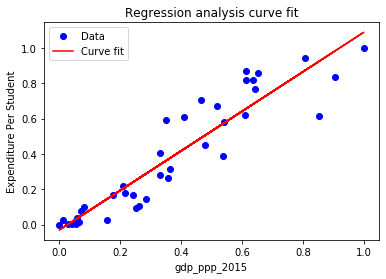

In [476]:
def fit_data_mat(df_data1, df_data2, degree, title, x_label, y_label):
    """Plot data from df_data1 and df_data2 and try to fit a curve with a given degree using matplotlib.pyplot
    :param df_data1: data frame
    :param df_data2: data frame
    :param degree: integer
    :param x_label: string
    :param y_label: string"""
    pylab.plot(df_data1, df_data2, 'bo', label='Data')
    pylab.title(title)
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    model = pylab.polyfit(df_data1, df_data2, degree)
    est_y_vals = pylab.polyval(model, df_data1)
    pylab.plot(df_data1, est_y_vals, 'r', label='Curve fit')
    pylab.legend(loc='best')
    pylab.show()

#plot with curve
line_consolidated_df_1 = fit_data_mat(consolidated_df_1 ['gdp_ppp_2015'], consolidated_df_1 ['Expenditure Per Student'], 1,
                                       'Regression analysis curve fit', 'gdp_ppp_2015',
                                   'Expenditure Per Student')

In [483]:
consolidated_df_1

consolidated_df_1_2 = consolidated_df_1.rename(columns={"Expenditure Per Student": "exp_per_student"})

In [484]:
import statsmodels.formula.api as smf
#perform OLS 
model_consolidated_df_1 = smf.ols(formula='gdp_ppp_2015 ~ exp_per_student', data=consolidated_df_1_2).fit()
model_consolidated_df_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp_ppp_2015   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     238.3
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.05e-17
Time:                        17:42:55   Log-Likelihood:                 34.836
No. Observations:                  39   AIC:                            -65.67
Df Residuals:                      37   BIC:                            -62.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0727      0.025      2.904      0.006       0.022       0.123
exp_per_student     0.7740      0.050     15.436      0.000       0.672       0.876
==============================================================================
Omnibus:                        6.246   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                4.865
Skew:                           0.786   Prob(JB):                       0.0878
Kurtosis:                       3.721   Cond. No.                         3.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [485]:
from sklearn.model_selection import  train_test_split
from sklearn import preprocessing

X = consolidated_df_1_2[['exp_per_student']]

y = consolidated_df_1_2[['gdp_ppp_2015']]

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)


In [486]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [487]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_train)

In [488]:
#training Data
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))

Coefficients: 
 [[0.80344058]]
Mean squared error: 0.01
Coefficient of determination: 0.87


In [489]:
# Make predictions using the testing set
y_pred = regr.predict(X_val)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_val, y_pred))

Coefficients: 
 [[0.80344058]]
Mean squared error: 0.01
Coefficient of determination: 0.88


In [490]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

random_model = RandomForestRegressor(n_estimators =100,
 min_samples_split = 10,
 min_samples_leaf = 15,
 max_features= 'auto',
 max_depth = 20,
 bootstrap = True)
random_model.fit(X_train, y_train)
r2_score(y_train, random_model.predict(X_train))

C:\Users\rohit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


-0.00011970001850136747

In [491]:
print('R2 score for training data' ,r2_score(y_train, random_model.predict(X_train)))
print('R2 score for test data',r2_score(y_test, random_model.predict(X_test)))

      
print('Root mean square error score on training set',np.sqrt(mean_squared_error(y_train,random_model.predict(X_train))))
print('Root mean square error score on test set',np.sqrt(mean_squared_error(y_test,random_model.predict(X_test))))


R2 score for training data -0.00011970001850136747
R2 score for test data -36.98085773695274
Root mean square error score on training set 0.2770984295001724
Root mean square error score on test set 0.21657893238300926


In [492]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [494]:
from sklearn.ensemble import RandomForestRegressor


random_model = RandomForestRegressor(n_estimators =200,
 min_samples_split = 5,
 min_samples_leaf = 4,
 max_features= 'auto',
 max_depth = 10,
 bootstrap = True)
random_model.fit(X_train, y_train)
r2_score(y_train, random_model.predict(X_train))

C:\Users\rohit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


0.8733893742264441

In [495]:
print(r2_score(y_test, random_model.predict(X_test)))

rmse = np.sqrt(mean_squared_error(y_test,random_model.predict(X_test)))
print(rmse)

-10.075063917019355
0.11695180932456348


In [467]:
standardized_Y_df = pd.DataFrame(standardized_Y) 

In [469]:
standardized_Y_df

0
0  -1.154758
1  -0.658453
2   0.741618
3   1.346847
4  -0.923545
5  -0.646259
6  -0.493968
7  -0.715981
8   0.708610
9   1.355756
10 -1.079583
11 -1.059114
12 -0.194646
13  0.627789
14  0.896183
15 -1.083750
16 -1.127470
17  0.080629
18  1.505800
19 -1.158674
20  0.724080
21  0.995281
22 -0.859957
23  1.911595
24 -0.358424
25 -0.617211
26  1.466533
27  0.216382
28 -1.160649
29  1.397253
30  0.026052
31 -1.106781
32 -0.297188
33  0.647445
34 -0.835529
35 -1.167934
36  1.199166
37  1.731236
38 -0.878378

In [468]:
standardized_X_df = pd.DataFrame(standardized_X) 

In [ ]:
def fit_data_mat(df_data1, df_data2, degree, title, x_label, y_label):
    """Plot data from df_data1 and df_data2 and try to fit a curve with a given degree using matplotlib.pyplot
    :param df_data1: data frame
    :param df_data2: data frame
    :param degree: integer
    :param x_label: string
    :param y_label: string"""
    pylab.plot(df_data1, df_data2, 'bo', label='Data')
    pylab.title(title)
    pylab.xlabel(x_label)
    pylab.ylabel(y_label)
    model = pylab.polyfit(df_data1, df_data2, degree)
    est_y_vals = pylab.polyval(model, df_data1)
    pylab.plot(df_data1, est_y_vals, 'r', label='Curve fit')
    pylab.legend(loc='best')
    pylab.show()

#plot with curve
lin_ave_gdp_ppp_log_lux = fit_data_mat(pisa_ave_gdp_ppp_log_lux ['gdp_ppp_log'], pisa_ave_gdp_ppp_log_lux ['ave_result'], 1,
                                       'Regression analysis curve fit (without Luxembourg)', 'GDP per capita (log)',
                                   'average test result (points)')

In [ ]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multi index data frame
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

In [ ]:
#read in file with student count for given countries
edu_indicators = {'SP.PRE.TOTL.IN':'pre_primary_pop', 'SP.PRM.TOTL.IN':'primary_pop', 'SP.SEC.LTOT.IN':'lower_sec_pop'}
basic_student_pop = load_from_wbdata(country_codes,edu_indicators, 2005)

In [242]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multi index data frame
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

#get GDP PPP data (NY.GDP.PCAP.PP.KD - GDP per capita, PPP (constant 2011 international $))
gdp_ppp = load_from_wbdata(                     
country_codes, {'NY.GDP.PCAP.PP.KD':'gdp_ppp_2015'}, 2015, 2015)

In [243]:
gdp_ppp

gdp_ppp_2015
country                   
Afghanistan    1766.593077
Angola         6644.857255
Albania       10970.321401
Argentina     19243.579469
Armenia        8171.832354
...                    ...
Samoa          5460.312292
Yemen, Rep.    3108.764217
South Africa  12345.928804
Zambia         3677.735019
Zimbabwe       2509.008140

[172 rows x 1 columns]

In [204]:
len(country_codes)  

173

In [248]:
basic_edu_exp_2005 = basic_edu_exp.query('Time == 2005')

In [332]:
basic_edu_exp_2005[['AUS']]

KeyError: "None of [Index(['AUS'], dtype='object')] are in the [columns]"

In [315]:
basic_edu_exp_2005[['LOCATION == VAT']]

KeyError: "None of [Index(['LOCATION == VAT'], dtype='object')] are in the [columns]"

In [314]:
basic_edu_exp_2005_WO_VAT = basic_edu_exp_2005.query('LOCATION != VAT')  #[['Country']]

UndefinedVariableError: name 'VAT' is not defined

In [317]:
def get_codes_list(df_data):
    """Create a list of countries codes from column Code in df_data
    change code for OECD members from OAVG to OED
    :param df_data: data frame
    :returns codes_list: list"""
    codes_list = df_data['LOCATION'].tolist()
    #print(code_list)
#    codes_list.remove('OAVG')
#    codes_list.append('OED')
    return codes_list

#get list of countries, who took PISA test
countries_codes = get_codes_list(basic_edu_exp_2005)

In [325]:
countries_codes.remove('VAT')


In [326]:
countries_codes

['AUS',
 'AUT',
 'BEL',
 'CZE',
 'DNK',
 'FIN',
 'FRA',
 'HUN',
 'ISL',
 'IRL',
 'ITA',
 'JPN',
 'KOR',
 'MEX',
 'NLD',
 'NZL',
 'NOR',
 'POL',
 'PRT',
 'SVK',
 'ESP',
 'SWE',
 'CHE',
 'GBR',
 'USA',
 'ARG',
 'AZE',
 'BRB',
 'BLR',
 'BLZ',
 'BMU',
 'BTN',
 'BRA',
 'BGR',
 'CMR',
 'TCD',
 'CHL',
 'COL',
 'COG',
 'CUB',
 'CYP',
 'DOM',
 'SLV',
 'EST',
 'GMB',
 'GHA',
 'GTM',
 'HKG',
 'IND',
 'IRN',
 'ISR',
 'JAM',
 'JOR',
 'KAZ',
 'KWT',
 'KGZ',
 'LAO',
 'LTU',
 'MRT',
 'MUS',
 'MAR',
 'NAM',
 'NIC',
 'OMN',
 'PER',
 'PHL',
 'ROU',
 'RUS',
 'RWA',
 'VCT',
 'SEN',
 'SVN',
 'ZAF',
 'SWZ',
 'TJK',
 'THA',
 'TUN',
 'URY',
 'ZMB',
 'AGO',
 'BFA',
 'QAT',
 'TZA',
 'UKR',
 'BWA',
 'AUS',
 'AUT',
 'BEL',
 'CZE',
 'DNK',
 'FIN',
 'FRA',
 'HUN',
 'ISL',
 'IRL',
 'ITA',
 'JPN',
 'KOR',
 'MEX',
 'NLD',
 'NZL',
 'NOR',
 'POL',
 'PRT',
 'SVK',
 'ESP',
 'SWE',
 'CHE',
 'GBR',
 'USA',
 'BRB',
 'BLZ',
 'BEN',
 'BMU',
 'BTN',
 'BGR',
 'BFA',
 'BDI',
 'CMR',
 'CPV',
 'TCD',
 'CHL',
 'COL',
 'CUB',
 'CYP',


In [300]:
countries_codes.remove('VAT')

In [301]:
countries_codes

['AUS',
 'AUT',
 'BEL',
 'CZE',
 'DNK',
 'FIN',
 'FRA',
 'HUN',
 'ISL',
 'IRL',
 'ITA',
 'JPN',
 'KOR',
 'MEX',
 'NLD',
 'NZL',
 'NOR',
 'POL',
 'PRT',
 'SVK',
 'ESP',
 'SWE',
 'CHE',
 'GBR',
 'USA',
 'ARG',
 'AZE',
 'BRB',
 'BLR',
 'BLZ',
 'BMU',
 'BTN',
 'BRA',
 'BGR',
 'CMR',
 'TCD',
 'CHL',
 'COL',
 'COG',
 'CUB',
 'CYP',
 'DOM',
 'SLV',
 'EST',
 'GMB',
 'GHA',
 'GTM',
 'HKG',
 'IND',
 'IRN',
 'ISR',
 'JAM',
 'JOR',
 'KAZ',
 'KWT',
 'KGZ',
 'LAO',
 'LTU',
 'MRT',
 'MUS',
 'MAR',
 'NAM',
 'NIC',
 'OMN',
 'PER',
 'PHL',
 'ROU',
 'RUS',
 'RWA',
 'VCT',
 'SEN',
 'SVN',
 'ZAF',
 'SWZ',
 'TJK',
 'THA',
 'TUN',
 'URY',
 'ZMB',
 'AGO',
 'BFA',
 'QAT',
 'TZA',
 'UKR',
 'BWA',
 'AUS',
 'AUT',
 'BEL',
 'CZE',
 'DNK',
 'FIN',
 'FRA',
 'HUN',
 'ISL',
 'IRL',
 'ITA',
 'JPN',
 'KOR',
 'MEX',
 'NLD',
 'NZL',
 'NOR',
 'POL',
 'PRT',
 'SVK',
 'ESP',
 'SWE',
 'CHE',
 'GBR',
 'USA',
 'BRB',
 'BLZ',
 'BEN',
 'BMU',
 'BTN',
 'BGR',
 'BFA',
 'BDI',
 'CMR',
 'CPV',
 'TCD',
 'CHL',
 'COL',
 'CUB',
 'CYP',


In [328]:
def load_from_wbdata(countries, indicators, year_from, year_to):
    """Create data frame for given list of countries, indicators and dates using World Bank API
    :param countries: list of codes
    :param indicators: dict {ind_code : ind_name}
    :param year_from: starting year
    :param year_to: ending year
    :returns df_data: multi index data frame
    """
    data_date = (datetime.datetime(year_from, 1, 1), datetime.datetime(year_to, 1, 1))
    df_data = wbdata.get_dataframe(indicators, country=countries, data_date=data_date, convert_date=False)
    return df_data

#get GDP PPP data (NY.GDP.PCAP.PP.KD - GDP per capita, PPP (constant 2011 international $))
gdp_ppp = load_from_wbdata({'AUS',
 'AUT',
 'BEL',
 'CZE',
 'DNK',
 'FIN',
 'FRA',
 'HUN',
 'ISL',
 'IRL',
 'ITA',
 'JPN',
 'KOR',
 'MEX',
 'NLD',
 'NZL',
 'NOR',
 'POL',
 'PRT',
 'SVK',
 'ESP',
 'SWE',
 'CHE',
 'GBR',
 'USA',
 'ARG',
 'AZE',
 'BRB',
 'BLR',
 'BLZ',
 'BMU',
 'BTN',
 'BRA',
 'BGR',
 'CMR',
 'TCD',
 'CHL',
 'COL',
 'COG',
 'CUB',
 'CYP',
 'DOM',
 'SLV',
 'EST',
 'GMB',
 'GHA',
 'GTM',
 'HKG',
 'IND',
 'IRN',
 'ISR',
 'JAM',
 'JOR',
 'KAZ',
 'KWT',
 'KGZ',
 'LAO',
 'LTU',
 'MRT',
 'MUS',
 'MAR',
 'NAM',
 'NIC',
 'OMN',
 'PER',
 'PHL',
 'ROU',
 'RUS',
 'RWA',
 'VCT',
 'SEN',
 'SVN',
 'ZAF',
 'SWZ',
 'TJK',
 'THA',
 'TUN',
 'URY',
 'ZMB',
 'AGO',
 'BFA',
 'QAT',
 'TZA',
 'UKR',
 'BWA',
 'AUS',
 'AUT',
 'BEL',
 'CZE',
 'DNK',
 'FIN',
 'FRA',
 'HUN',
 'ISL',
 'IRL',
 'ITA',
 'JPN',
 'KOR',
 'MEX',
 'NLD',
 'NZL',
 'NOR',
 'POL',
 'PRT',
 'SVK',
 'ESP',
 'SWE',
 'CHE',
 'GBR',
 'USA',
 'BRB',
 'BLZ',
 'BEN',
 'BMU',
 'BTN',
 'BGR',
 'BFA',
 'BDI',
 'CMR',
 'CPV',
 'TCD',
 'CHL',
 'COL',
 'CUB',
 'CYP',
 'DOM',
 'SLV',
 'EST',
 'GMB',
 'GHA',
 'GTM',
 'HKG',
 'IND',
 'IRN',
 'ISR',
 'JAM',
 'JOR',
 'KWT',
 'LAO',
 'LSO',
 'LTU',
 'MDV',
 'MRT',
 'MUS',
 'MAR',
 'NAM',
 'NIC',
 'OMN',
 'PER',
 'PHL',
 'ROU',
 'RWA',
 'VCT',
 'SEN',
 'ZAF',
 'SWZ',
 'TZA',
 'TGO',
 'TUN',
 'URY',
 'ZMB',
 'AGO',
 'ARG',
 'BWA',
 'BRA',
 'COG',
 'MDG',
 'AUS',
 'AUT',
 'CZE',
 'DNK',
 'FIN',
 'FRA',
 'HUN',
 'ISL',
 'IRL',
 'ITA',
 'JPN',
 'KOR',
 'LUX',
 'MEX',
 'NLD',
 'NZL',
 'NOR',
 'POL',
 'PRT',
 'SVK',
 'SWE',
 'CHE',
 'GBR',
 'USA',
 'BLZ',
 'BMU',
 'BRA',
 'BGR',
 'CHL',
 'CUB',
 'CYP',
 'DOM',
 'SLV',
 'EST',
 'GMB',
 'GHA',
 'GTM',
 'IND',
 'IRN',
 'JAM',
 'JOR',
 'KWT',
 'LTU',
 'NIC',
 'OMN',
 'PHL',
 'ROU',
 'SEN',
 'SWZ',
 'URY',
 'AGO',
 'ARG',
 'COG'}
, {'NY.GDP.PCAP.PP.KD':'gdp_ppp_2015'}, 2015, 2015)

In [329]:
gdp_ppp

gdp_ppp_2015
country                                     
Angola                           6644.857255
Argentina                       19243.579469
Australia                       43970.803704
Austria                         44197.540203
Azerbaijan                      16828.990160
...                                      ...
Uruguay                         19945.034681
United States                   53187.573374
St. Vincent and the Grenadines  10470.977616
South Africa                    12345.928804
Zambia                           3677.735019

[93 rows x 1 columns]